<a href="https://colab.research.google.com/github/nandinisonar18/Loan-Case-Study/blob/main/Loan_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the 'application_data.csv'**


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
df_appData = pd.read_csv ('application_data.csv')
df_prevData = pd.read_csv ('previous_application.csv')

In [28]:
df_appData.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [29]:
df_appData.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294973 entries, 0 to 294972
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [30]:
df_appData.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294973 entries, 0 to 294972
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

# **Data Quality Check and Missing values**

In [36]:
df_appData.agg(['count','size','nunique'])

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,294973,294973,294973,294973,294973,294973,294973,294973,294973,294961,294707,293739,294973,294973,294973,294973,294973,294973,294973,294973,294973,100276,294973,294973,294973,294973,294973,294973,202611,294971,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,128707,294342,236504,145350,122397,151165,98911,88967,137836,146530,148279,94917,119898,93413,146989,90237,132285,145350,122397,151165,98911,88967,137836,146530,148279,94917,119898,93413,146989,90237,132285,145350,122397,151165,98911,88967,137836,146530,148279,94917,119898,93413,146989,90237,132285,93315,147051,152675,145079,155241,294000,294000,294000,293999,294971,294972,294972,294972,294972,294972,294972,294972,294972,294972,294972,294972,294972,294972,294972,294972,294972,294972,294972,294972,294972,255163,255163,255163,255163,255163,255163
size,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973,294973
nunique,294973,2,2,3,2,2,15,2469,5542,13575,977,7,8,5,6,6,81,17450,12501,15648,6159,62,2,2,2,2,

In [31]:
df_prevData.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15.0,Y,1.0,0.0,0.182832,0.867336,XAP,Approved,-73.0,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35.0,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-164.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1.0,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-301.0,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-512.0,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9.0,Y,1.0,NaN,NaN,NaN,Repairs,Refused,-781.0,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df_prevData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660098 entries, 0 to 660097
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_PREV                   660098 non-null  int64  
 1   SK_ID_CURR                   660098 non-null  int64  
 2   NAME_CONTRACT_TYPE           660098 non-null  object 
 3   AMT_ANNUITY                  514035 non-null  float64
 4   AMT_APPLICATION              660098 non-null  float64
 5   AMT_CREDIT                   660098 non-null  float64
 6   AMT_DOWN_PAYMENT             310266 non-null  float64
 7   AMT_GOODS_PRICE              509379 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   660097 non-null  object 
 9   HOUR_APPR_PROCESS_START      660097 non-null  float64
 10  FLAG_LAST_APPL_PER_CONTRACT  660097 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       660097 non-null  float64
 12  RATE_DOWN_PAYMENT            310266 non-null  float64
 13 

In [33]:
df_prevData.agg(['count','size','nunique'])

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,660098,660098,660098,514035,660098,660098,310266,509379,660097,660097,660097,660097,310266,2355,2355,660097,660097,660097,660097,660097,336196,660097,660097,660097,660097,660097,660097,660097,514037,660097,659966,396616,396616,396616,396616,396616,396616
size,660098,660098,660098,660098,660098,660098,660098,660098,660098,660098,660098,660098,660098,660098,660098,660098,660098,660098,660098,660098,660098,660098,660098,660098,660098,660098,660098,660098,660098,660098,660098,660098,660098,660098,660098,660098,660098
nunique,660098,263136,4,214870,60841,64127,17367,60841,7,24,2,2,100557,91,22,25,4,2921,4,9,7,4,27,5,3,8,1944,11,46,5,17,2628,2892,4571,2851,2807,2


# **Find Missing Values in application data DataFrames**

In [34]:
(df_appData.isnull().sum() * 100 / len(df_appData)).sort_values(ascending=False).head(50)

COMMONAREA_MEDI                 69.838934
COMMONAREA_AVG                  69.838934
COMMONAREA_MODE                 69.838934
NONLIVINGAPARTMENTS_MODE        69.408387
NONLIVINGAPARTMENTS_AVG         69.408387
NONLIVINGAPARTMENTS_MEDI        69.408387
FONDKAPREMONT_MODE              68.364901
LIVINGAPARTMENTS_MODE           68.331678
LIVINGAPARTMENTS_AVG            68.331678
LIVINGAPARTMENTS_MEDI           68.331678
FLOORSMIN_AVG                   67.821801
FLOORSMIN_MODE                  67.821801
FLOORSMIN_MEDI                  67.821801
YEARS_BUILD_MEDI                66.467778
YEARS_BUILD_MODE                66.467778
YEARS_BUILD_AVG                 66.467778
OWN_CAR_AGE                     66.005024
LANDAREA_MEDI                   59.352890
LANDAREA_MODE                   59.352890
LANDAREA_AVG                    59.352890
BASEMENTAREA_MEDI               58.505694
BASEMENTAREA_AVG                58.505694
BASEMENTAREA_MODE               58.505694
EXT_SOURCE_1                    56

In [35]:
(df_prevData.isnull().sum() * 100 / len(df_prevData)).sort_values(ascending=False).head(20)

RATE_INTEREST_PRIVILEGED     99.643235
RATE_INTEREST_PRIMARY        99.643235
RATE_DOWN_PAYMENT            52.996979
AMT_DOWN_PAYMENT             52.996979
NAME_TYPE_SUITE              49.068775
NFLAG_INSURED_ON_APPROVAL    39.915588
DAYS_FIRST_DRAWING           39.915588
DAYS_FIRST_DUE               39.915588
DAYS_LAST_DUE_1ST_VERSION    39.915588
DAYS_LAST_DUE                39.915588
DAYS_TERMINATION             39.915588
AMT_GOODS_PRICE              22.832822
AMT_ANNUITY                  22.127472
CNT_PAYMENT                  22.127169
PRODUCT_COMBINATION           0.019997
CHANNEL_TYPE                  0.000151
NAME_PRODUCT_TYPE             0.000151
NAME_YIELD_GROUP              0.000151
SELLERPLACE_AREA              0.000151
NAME_SELLER_INDUSTRY          0.000151
dtype: float64

# **Removing Columns with high percentage (90%+) of Missing Values**



In [37]:
appData_90per_rowcount = df_appData.shape[0]*0.9

Col_list_90perNULLS_appData = df_appData.columns[df_appData.isnull().sum()>appData_90per_rowcount]
print('Total Columns with 90% null value in application data: ',len(Col_list_90perNULLS_appData))

Total Columns with 90% null value in application data:  0


In [38]:
df_appData.drop(Col_list_90perNULLS_appData, axis=1, inplace=True)

df_appData.shape

(294973, 122)

In [39]:
prevData_90per_rowcount = df_prevData.shape[0]*0.9
Col_list_90perNULLS_prevData = df_prevData.columns[df_prevData.isnull().sum()>prevData_90per_rowcount]
print('Total Columns with 90% null value in df_prevData: ',len(Col_list_90perNULLS_prevData))


Total Columns with 90% null value in df_prevData:  2


In [40]:
df_prevData.drop(Col_list_90perNULLS_prevData, axis=1, inplace=True)
df_prevData.shape

(660098, 35)

# **Identifying columns with very less missing values (around 13% missing values)**

In [41]:
appData_13per_rowcount = df_appData.shape[0]*0.13
Col_list_13perNULLS_appData = df_appData.columns[df_appData.isnull().sum()<appData_13per_rowcount]
print('Total Columns with 13% null value in application data: ',len(Col_list_13perNULLS_appData))


Total Columns with 13% null value in application data:  65


In [42]:
df_appData[Col_list_13perNULLS_appData].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294973 entries, 0 to 294972
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   294973 non-null  int64  
 1   TARGET                       294973 non-null  int64  
 2   NAME_CONTRACT_TYPE           294973 non-null  object 
 3   CODE_GENDER                  294973 non-null  object 
 4   FLAG_OWN_CAR                 294973 non-null  object 
 5   FLAG_OWN_REALTY              294973 non-null  object 
 6   CNT_CHILDREN                 294973 non-null  int64  
 7   AMT_INCOME_TOTAL             294973 non-null  float64
 8   AMT_CREDIT                   294973 non-null  float64
 9   AMT_ANNUITY                  294961 non-null  float64
 10  AMT_GOODS_PRICE              294707 non-null  float64
 11  NAME_TYPE_SUITE              293739 non-null  object 
 12  NAME_INCOME_TYPE             294973 non-null  object 
 13 

In [43]:
#calculating 13% rowcount for Previous application data
prevData_13per_rowcount = df_prevData.shape[0]*0.13
#List of columns with more than 13% missing values in Previous application data
Col_list_13perNULLS_prevData = df_prevData.columns[df_prevData.isnull().sum()<appData_13per_rowcount]
print('Total Columns with 13% null value in Previous application data: ',len(Col_list_13perNULLS_prevData))

Total Columns with 13% null value in Previous application data:  23


In [44]:
df_prevData[Col_list_13perNULLS_prevData].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660098 entries, 0 to 660097
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_PREV                   660098 non-null  int64  
 1   SK_ID_CURR                   660098 non-null  int64  
 2   NAME_CONTRACT_TYPE           660098 non-null  object 
 3   AMT_APPLICATION              660098 non-null  float64
 4   AMT_CREDIT                   660098 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START   660097 non-null  object 
 6   HOUR_APPR_PROCESS_START      660097 non-null  float64
 7   FLAG_LAST_APPL_PER_CONTRACT  660097 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY       660097 non-null  float64
 9   NAME_CASH_LOAN_PURPOSE       660097 non-null  object 
 10  NAME_CONTRACT_STATUS         660097 non-null  object 
 11  DAYS_DECISION                660097 non-null  float64
 12  NAME_PAYMENT_TYPE            660097 non-null  object 
 13 

In [45]:
# Sorted missing % for Application data
(df_appData.isnull().sum() * 100 / len(df_appData)).sort_values(ascending=False).head(70)

COMMONAREA_MEDI             69.838934
COMMONAREA_AVG              69.838934
COMMONAREA_MODE             69.838934
NONLIVINGAPARTMENTS_MODE    69.408387
NONLIVINGAPARTMENTS_AVG     69.408387
                              ...    
DAYS_LAST_PHONE_CHANGE       0.000678
CNT_FAM_MEMBERS              0.000678
FLAG_DOCUMENT_9              0.000339
FLAG_DOCUMENT_21             0.000339
FLAG_DOCUMENT_2              0.000339
Length: 70, dtype: float64

In [46]:
# Sorted missing % for Previous Application data
(df_prevData.isnull().sum() * 100 / len(df_prevData)).sort_values(ascending=False).head(25)

RATE_DOWN_PAYMENT            52.996979
AMT_DOWN_PAYMENT             52.996979
NAME_TYPE_SUITE              49.068775
NFLAG_INSURED_ON_APPROVAL    39.915588
DAYS_TERMINATION             39.915588
DAYS_LAST_DUE                39.915588
DAYS_LAST_DUE_1ST_VERSION    39.915588
DAYS_FIRST_DUE               39.915588
DAYS_FIRST_DRAWING           39.915588
AMT_GOODS_PRICE              22.832822
AMT_ANNUITY                  22.127472
CNT_PAYMENT                  22.127169
PRODUCT_COMBINATION           0.019997
NAME_YIELD_GROUP              0.000151
NAME_SELLER_INDUSTRY          0.000151
SELLERPLACE_AREA              0.000151
CHANNEL_TYPE                  0.000151
NAME_PRODUCT_TYPE             0.000151
NAME_GOODS_CATEGORY           0.000151
NAME_PORTFOLIO                0.000151
CODE_REJECT_REASON            0.000151
NAME_CLIENT_TYPE              0.000151
NAME_PAYMENT_TYPE             0.000151
DAYS_DECISION                 0.000151
NAME_CONTRACT_STATUS          0.000151
dtype: float64

# **Checking the datatypes of all the columns and change the datatype if required.**



In [47]:
df_appData.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [48]:
df_appData.select_dtypes('float64').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI'

In [49]:
df_appData.select_dtypes('int64').columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'],
      dtype='object')

In [50]:
df_prevData.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [51]:
df_prevData.select_dtypes('float64').columns

Index(['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [52]:
df_prevData.select_dtypes('int64').columns

Index(['SK_ID_PREV', 'SK_ID_CURR'], dtype='object')

In [53]:
df_appData.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

SK_ID_CURR                     294973
TARGET                              2
CNT_CHILDREN                       15
DAYS_BIRTH                      17450
DAYS_EMPLOYED                   12501
DAYS_ID_PUBLISH                  6159
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
dtype: int64

# **Function to calculate & identify datatypes in application data**

In [54]:
def metadata(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    unique = data.nunique()
    datatypes = data.dtypes
    return pd.concat([total, percent, unique, datatypes], axis=1, keys=['Total', 'Percent', 'Unique', 'Data_Type']).sort_values(by="Percent", ascending=False)

app_metadata=metadata(df_appData)
app_metadata.head(20)

,Total,Percent,Unique,Data_Type
COMMONAREA_MEDI,206006,69.838934,3183,float64
COMMONAREA_AVG,206006,69.838934,3162,float64
COMMONAREA_MODE,206006,69.838934,3110,float64
NONLIVINGAPARTMENTS_MODE,204736,69.408387,166,float64
NONLIVINGAPARTMENTS_AVG,204736,69.408387,383,float64
NONLIVINGAPARTMENTS_MEDI,204736,69.408387,213,float64
FONDKAPREMONT_MODE,201658,68.364901,4,object
LIVINGAPARTMENTS_MODE,201560,68.331678,736,float64
LIVINGAPARTMENTS_AVG,201560,68.331678,1858,float64
LIVINGAPARTMENTS_MEDI,201560,68.331678,1096,float64


In [55]:
#columns to convert 0/1 to Y/N
cols_to_convert=list(app_metadata[(app_metadata.Unique==2)&(app_metadata.Data_Type=="int64")].index)

#function to conver columns
def convert_data(df_appData, cols_to_convert):
    for y in cols_to_convert:
        df_appData.loc[:,y].replace((0, 1), ('N', 'Y'), inplace=True)
    return df_appData

#calling the function for application_data
convert_data(df_appData, cols_to_convert)
df_appData.TARGET.replace(('N', 'Y'), (0, 1), inplace=True)
df_appData.dtypes.value_counts()

float64    85
object     28
int64       9
dtype: int64

In [56]:
defaulters=df_appData[df_appData.TARGET==1]

nondefaulters=df_appData[df_appData.TARGET==0]

# **Identifying Categorical Columns for Analysis:**



In [57]:
df_appData.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

# **Univariate & Bivariate Analyis on Numeric Columns**

**REMOVING OUTLIERS**



In [58]:
def plot_boxhist(var):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    s=sns.boxplot(y=defaulters[var]);
    plt.title('Box Plot of '+ '%s' %var +' for Defaulters', fontsize=10)
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
    plt.subplot(1, 2, 2)
    s=plt.hist(x=defaulters[var]);
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
    plt.title('Histogram of '+ '%s' %var +' for Defaulters', fontsize=10)
plt.show()

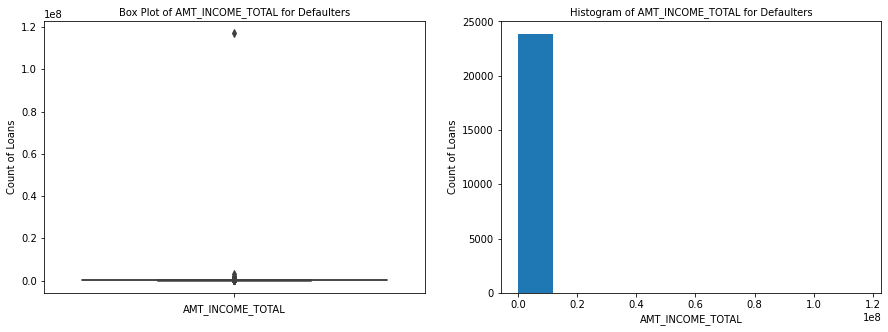

In [59]:
plot_boxhist('AMT_INCOME_TOTAL')

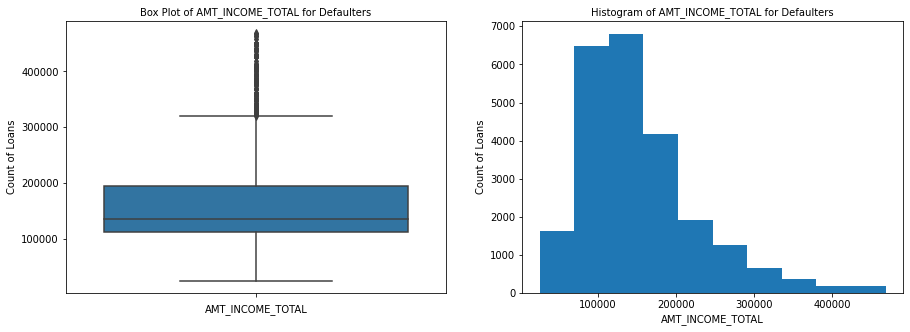

In [60]:
#Removing entries over 99 percentile
df_appData=df_appData[df_appData.AMT_INCOME_TOTAL<np.nanpercentile(df_appData['AMT_INCOME_TOTAL'], 99)]

#update dataframes
defaulters=df_appData[df_appData.TARGET==1] 
nondefaulters=df_appData[df_appData.TARGET==0]

plot_boxhist('AMT_INCOME_TOTAL')

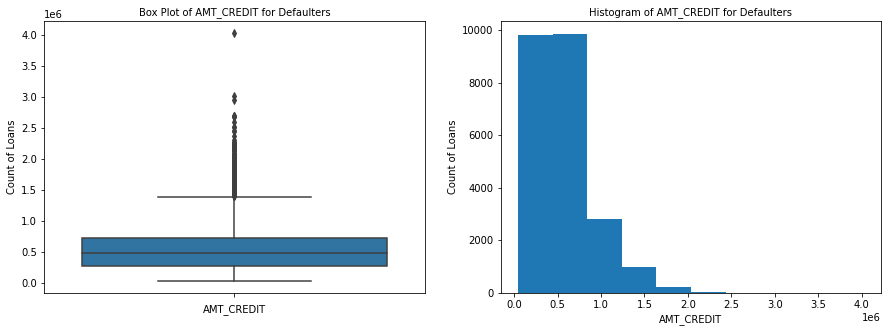

In [61]:
#Plotting for AMT_INCOME_TOTAL for Application Data
plot_boxhist('AMT_CREDIT')

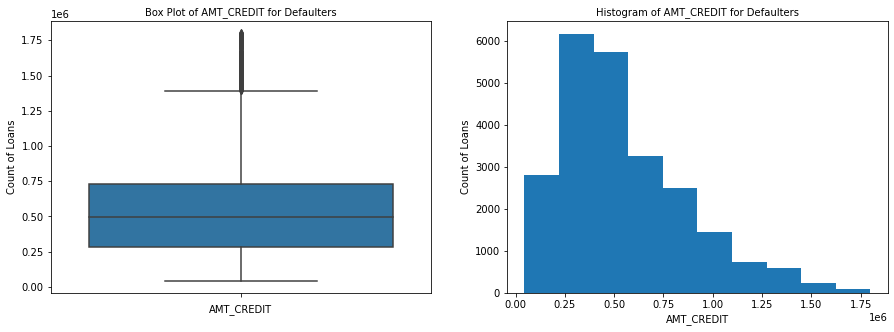

In [62]:
#Removing entries over 99 percentile
df_appData=df_appData[df_appData.AMT_CREDIT<np.nanpercentile(df_appData['AMT_CREDIT'], 99)]

#update dataframes
defaulters=df_appData[df_appData.TARGET==1] 
nondefaulters=df_appData[df_appData.TARGET==0]

plot_boxhist('AMT_CREDIT')


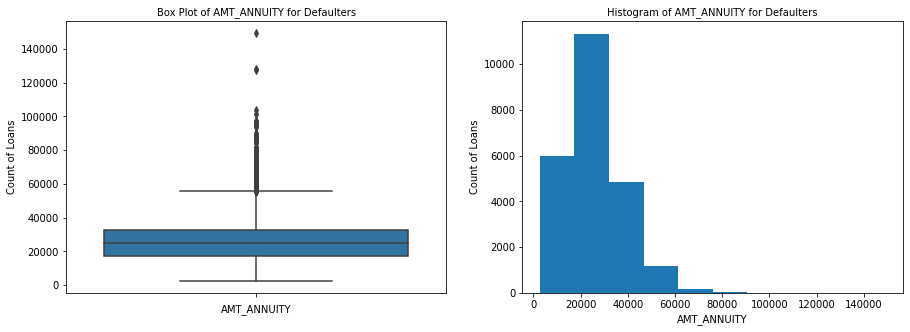

In [63]:
#Plotting for AMT_ANNUITY for Application Data
plot_boxhist('AMT_ANNUITY')

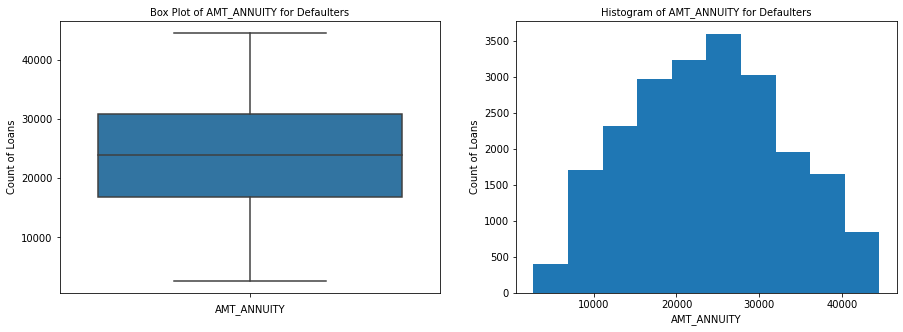

In [64]:
#Removing entries over 99 percentile
df_appData=df_appData[df_appData.AMT_ANNUITY<np.nanpercentile(df_appData['AMT_ANNUITY'], 90)]

#update dataframes
defaulters=df_appData[df_appData.TARGET==1] 
nondefaulters=df_appData[df_appData.TARGET==0]

plot_boxhist('AMT_ANNUITY')

# **Binning of Continuous Variables:**



In [65]:
df_appData['AMT_INCOME_TOTAL'].describe()

count    259578.000000
mean     153732.466484
std       70922.503446
min       25650.000000
25%      108000.000000
50%      135000.000000
75%      180000.000000
max      468823.500000
Name: AMT_INCOME_TOTAL, dtype: float64

In [66]:
# Binning for Income Bracket
pd.set_option('mode.chained_assignment', None)
defaulters.loc[:,'INCOME_BRACKET']=pd.qcut(df_appData.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.50,0.90,1], labels=['Very_low','Low','Medium','High','Very_high'])
nondefaulters.loc[:,'INCOME_BRACKET']=pd.qcut(df_appData.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.50,0.90,1], labels=['Very_low','Low','Medium','High','Very_high'])

In [67]:
def plot_charts(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15,20))
    
    s1=sns.countplot(ax=ax1,x=defaulters[var], data=defaulters, order= defaulters[var].value_counts().index,)
    ax1.set_title('Distribution of '+ '%s' %var +' for Defaulters', fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    s2=sns.countplot(ax=ax2,x=nondefaulters[var], data=nondefaulters, order= nondefaulters[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title('Distribution of '+ '%s' %var +' for Non-Defaulters', fontsize=10)
    plt.show()

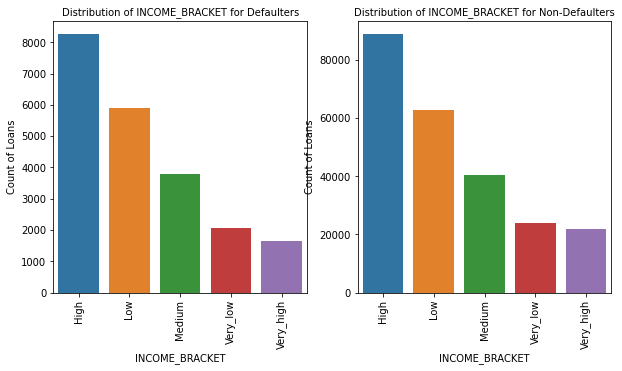

In [68]:
plot_charts('INCOME_BRACKET', label_rotation=True,horizontal_layout=True)

In [69]:
#Binning on Annuity Amount
defaulters.loc[:,'AMT_ANNUITY_BINS']=pd.qcut(df_appData.loc[:,'AMT_ANNUITY'], [0,0.30,0.50,0.85,0.1], labels=['Low','Medium','High','Very_High'])
nondefaulters.loc[:,'AMT_ANNUITY_BINS']=pd.qcut(df_appData.loc[:,'AMT_ANNUITY'], [0,0.30,0.50,0.85,1], labels=['Low','Medium','High','Very_High'])

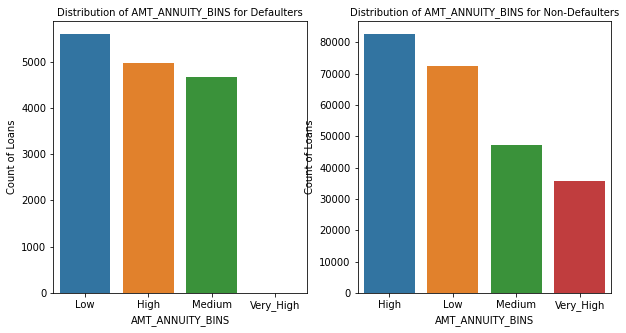

In [70]:
plot_charts('AMT_ANNUITY_BINS', label_rotation=False,horizontal_layout=True)

# **Imbalance Ratio between Defaulters & Non-Defaulters:**

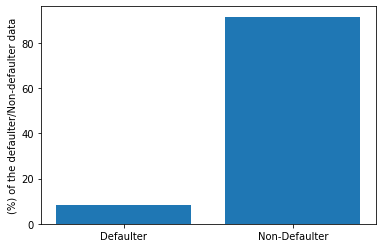

Ratios of imbalance in percentage for non-defaulter and defaulter datas are: 91.636425 and 8.363575
Ratios of imbalance in real-numbers for non-defaulter and defaulter datas is 10.956610 : 1 (approx)


In [71]:
Def_cnt = 0; Nondef_cnt = 0 # initialisation

for i in df_appData['TARGET'].values:
    if i == 1:
        Def_cnt = Def_cnt+1
    else:
        Nondef_cnt = Nondef_cnt+1
        
Def_cnt_perc = (Def_cnt/(Def_cnt + Nondef_cnt))*100

Nondef_perc = (Nondef_cnt/(Def_cnt + Nondef_cnt))*100

X = ['Defaulter','Non-Defaulter']

Y = [Def_cnt_perc, Nondef_perc]

plt.bar(X,Y, width = 0.8)

plt.ylabel('(%) of the defaulter/Non-defaulter data')

plt.show()

print('Ratios of imbalance in percentage for non-defaulter and defaulter datas are: %f and %f'%(Nondef_perc,Def_cnt_perc))
print('Ratios of imbalance in real-numbers for non-defaulter and defaulter datas is %f : 1 (approx)'%(Nondef_cnt/Def_cnt))


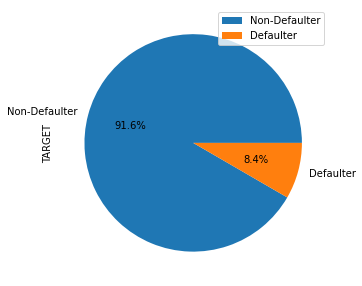

In [72]:
bin_def = pd.DataFrame(df_appData['TARGET'].value_counts(normalize=True) * 100)
bin_def.index=('Non-Defaulter', 'Defaulter')
bin_def.plot.pie(y='TARGET', figsize=(5, 5), autopct='%1.1f%%')
plt.show()

# **Univariate Analysis for categorical variables:**

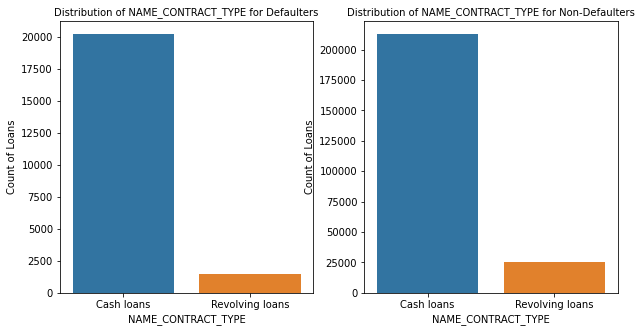

In [73]:
#Plot on NAME_CONTRACT_TYPE
plot_charts('NAME_CONTRACT_TYPE', label_rotation=False,horizontal_layout=True)

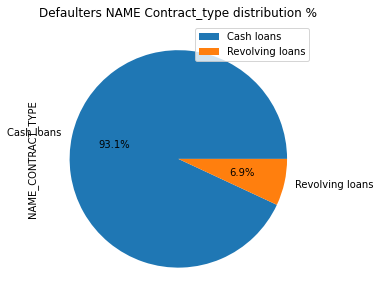

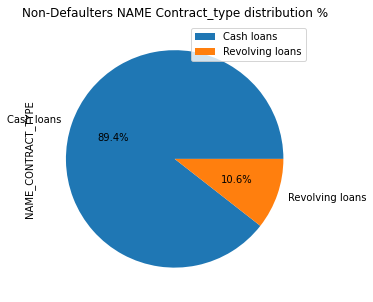

In [74]:
bin_con_type_def = pd.DataFrame(defaulters['NAME_CONTRACT_TYPE'].value_counts(normalize=True) * 100)
#print(bin_con_type_def)
bin_con_type_def.plot.pie(y='NAME_CONTRACT_TYPE', figsize=(5, 5), autopct='%1.1f%%')
plt.title('Defaulters NAME Contract_type distribution %')
plt.show()


bin_con_type_nondef = pd.DataFrame(nondefaulters['NAME_CONTRACT_TYPE'].value_counts(normalize=True) * 100)
#print(bin_con_type_def)
bin_con_type_nondef.plot.pie(y='NAME_CONTRACT_TYPE', figsize=(5, 5), autopct='%1.1f%%')
plt.title('Non-Defaulters NAME Contract_type distribution %')

plt.show()

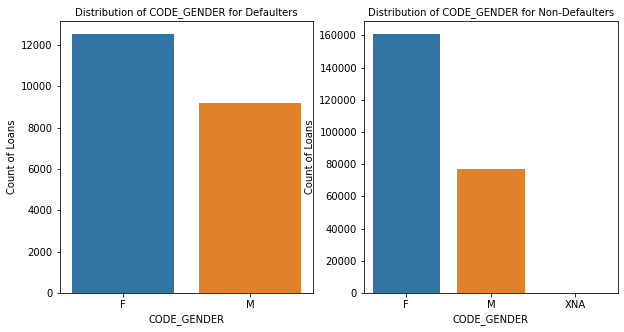

In [75]:
#Plot on CODE_GENDER
plot_charts('CODE_GENDER', label_rotation=False,horizontal_layout=True)

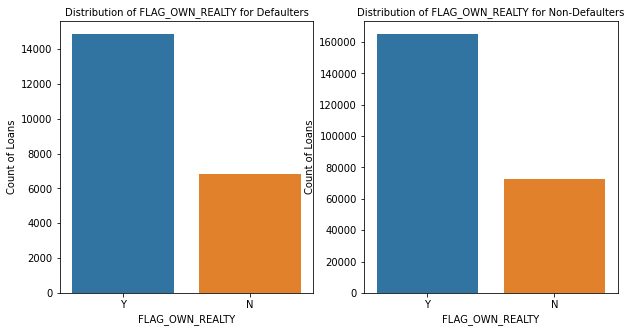

In [76]:
#Plot on FLAG_OWN_REALTY
plot_charts('FLAG_OWN_REALTY', label_rotation=False,horizontal_layout=True)

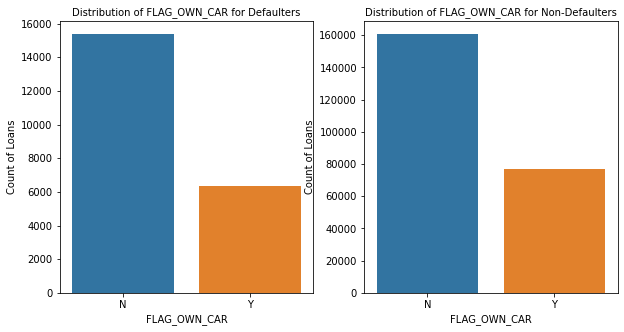

In [77]:
#Plot on FLAG_OWN_CAR
plot_charts('FLAG_OWN_CAR', label_rotation=False,horizontal_layout=True)

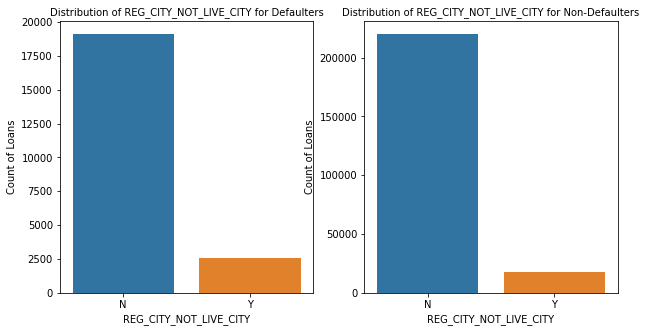

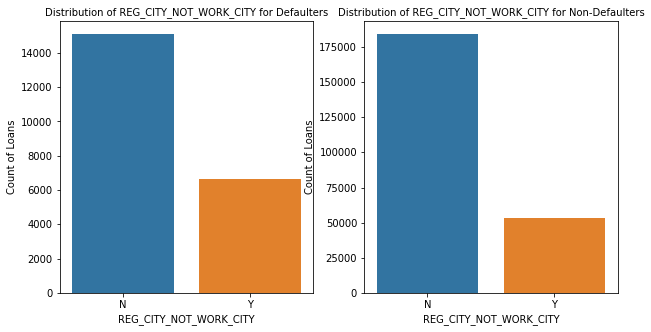

In [78]:
#Plot for  REG_CITY_NOT_LIVE_CITY & REG_CITY_NOT_WORK_CITY
plot_charts('REG_CITY_NOT_LIVE_CITY', label_rotation=False,horizontal_layout=True)
plot_charts('REG_CITY_NOT_WORK_CITY', label_rotation=False,horizontal_layout=True)

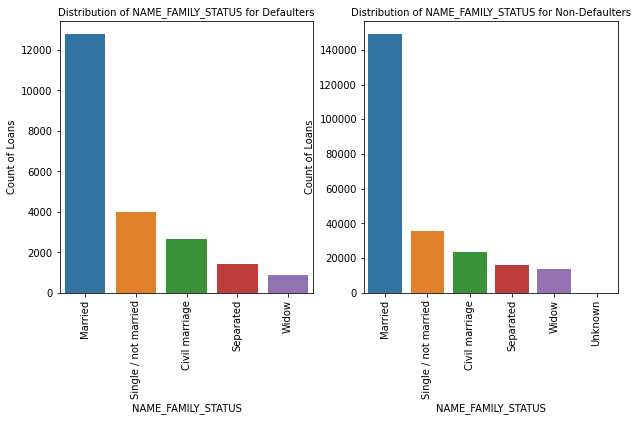

In [79]:
#Plot for NAME_FAMILY_STATUS
plot_charts('NAME_FAMILY_STATUS', label_rotation=True,horizontal_layout=True)

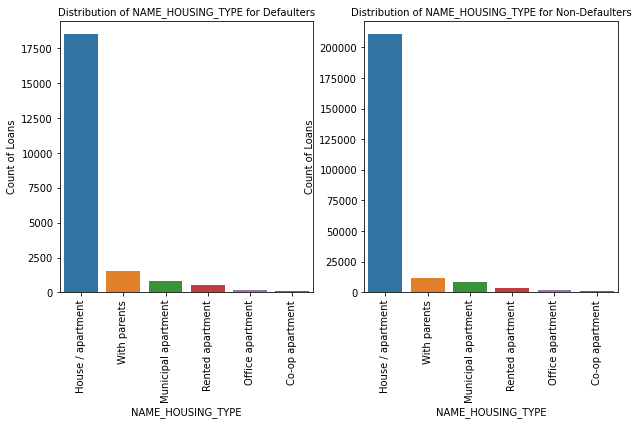

In [80]:
#Plot for NAME_HOUSING_TYPE
plot_charts('NAME_HOUSING_TYPE', label_rotation=True,horizontal_layout=True)

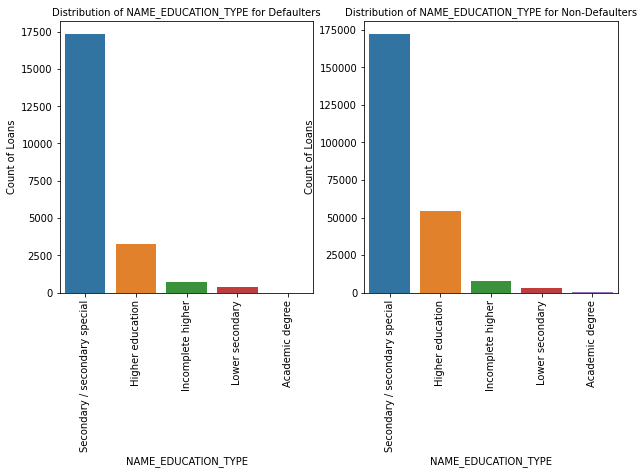

In [81]:
#Plot for NAME_EDUCATION_TYPE
plot_charts('NAME_EDUCATION_TYPE', label_rotation=True,horizontal_layout=True)

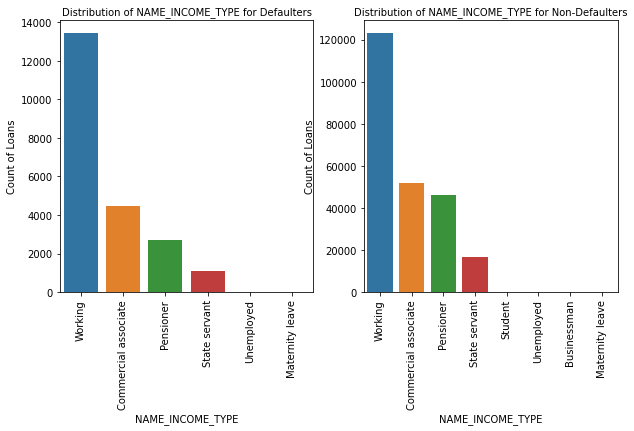

In [82]:
#Plot for NAME_INCOME_TYPE
plot_charts('NAME_INCOME_TYPE', label_rotation=True,horizontal_layout=True)


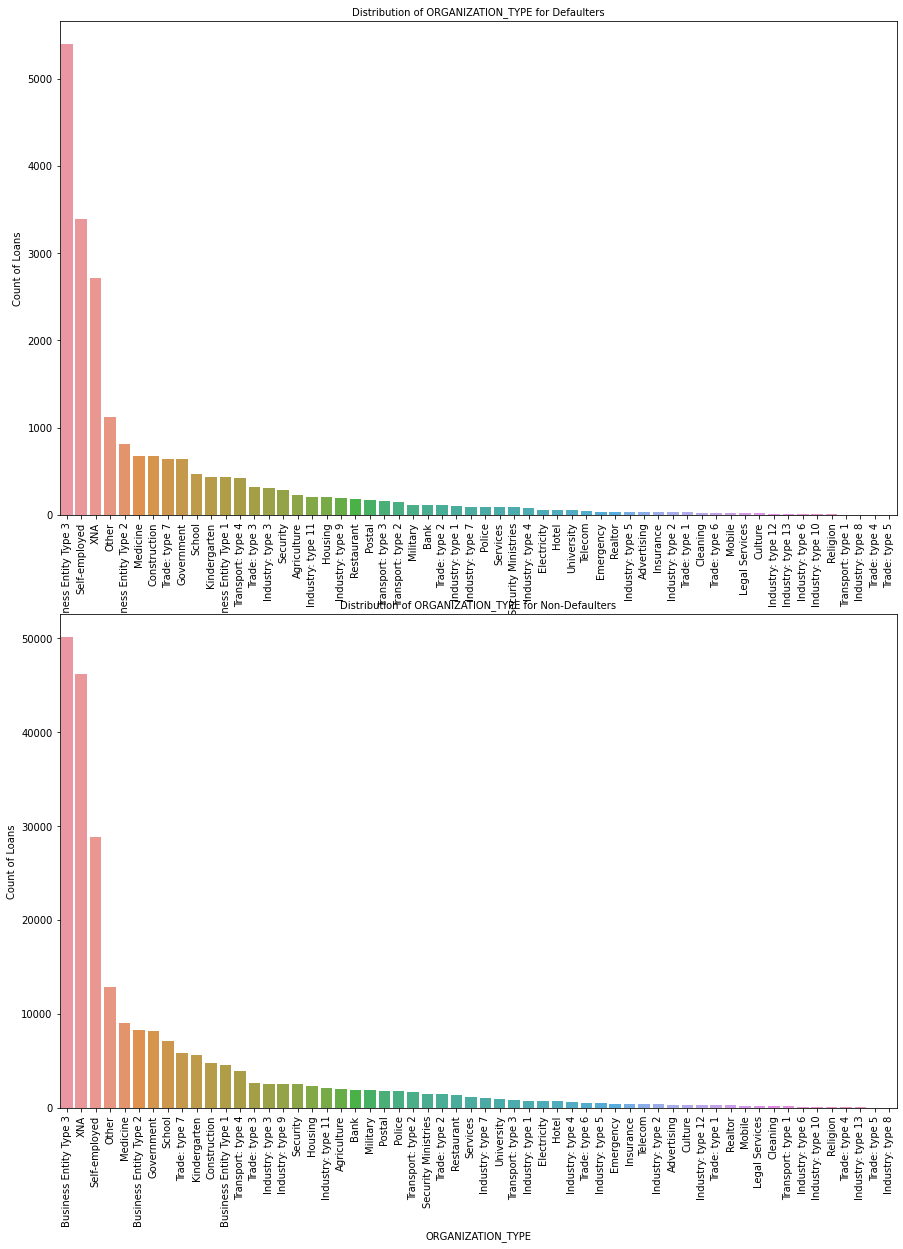

In [83]:
#Plot for ORGANIZATION_TYPE
plot_charts('ORGANIZATION_TYPE', label_rotation=True,horizontal_layout=False)


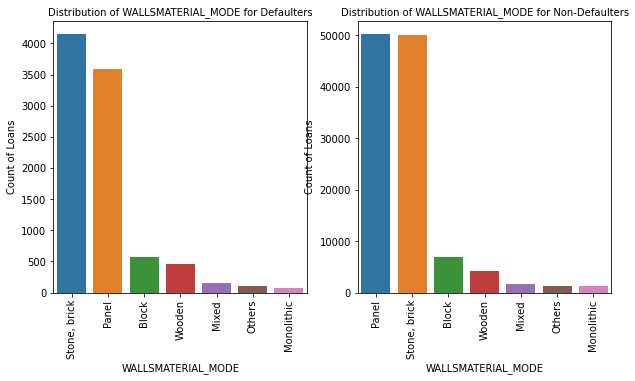

In [84]:
#Plot for WALLSMATERIAL_MODE
plot_charts('WALLSMATERIAL_MODE', label_rotation=True,horizontal_layout=True)

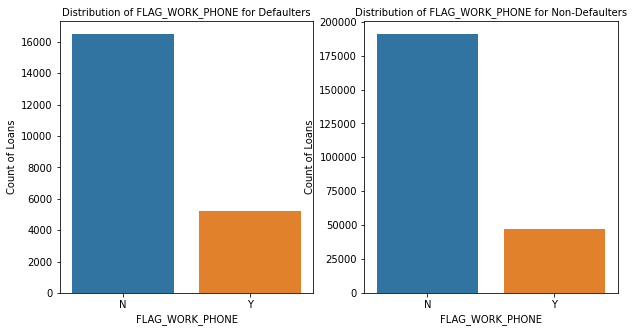

In [85]:
#Plot for FLAG_WORK_PHONE
plot_charts('FLAG_WORK_PHONE', label_rotation=False,horizontal_layout=True)

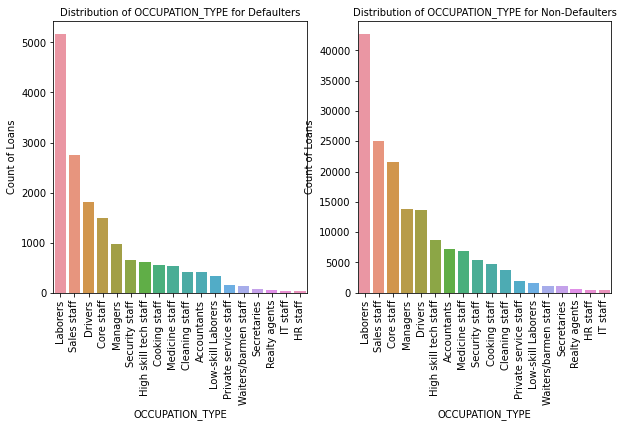

In [86]:
#Plot on OCCUPATION_TYPE
plot_charts('OCCUPATION_TYPE', label_rotation=True,horizontal_layout=True)

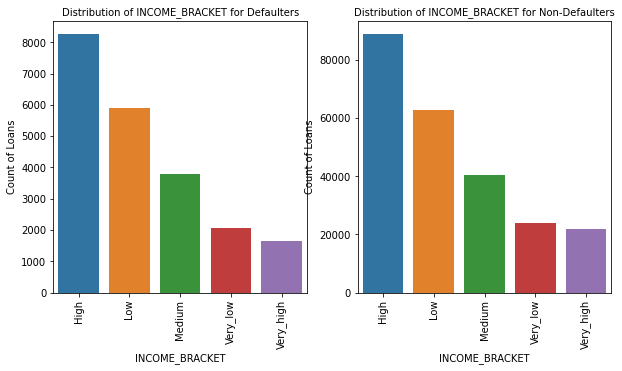

In [87]:
#Plot on Income Bracket
plot_charts('INCOME_BRACKET', label_rotation=True,horizontal_layout=True)

# **Bi-Variate Analysis of Variables & Correlation:**



In [88]:
#selecting columns to perform correlation

cols=['EXT_SOURCE_1', 'EXT_SOURCE_3', 'EXT_SOURCE_2','AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL',
'DAYS_REGISTRATION', 'REGION_POPULATION_RELATIVE','CNT_CHILDREN', 'HOUR_APPR_PROCESS_START','REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED', 'DAYS_BIRTH']

In [89]:
defaulters_1=defaulters[cols]
defaulters_correlation = defaulters_1.corr()
round(defaulters_correlation, 3)

,EXT_SOURCE_1,EXT_SOURCE_3,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,AMT_INCOME_TOTAL,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,CNT_CHILDREN,HOUR_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_BIRTH
EXT_SOURCE_1,1.000,0.141,0.167,0.172,0.077,-0.054,-0.136,0.163,0.054,-0.158,0.072,-0.092,0.014,-0.060,-0.064,-0.123,0.296,-0.581
EXT_SOURCE_3,0.141,1.000,0.075,0.079,0.029,-0.020,-0.065,0.078,-0.072,-0.087,-0.010,-0.020,-0.049,0.004,0.006,-0.129,0.097,-0.175
EXT_SOURCE_2,0.167,0.075,1.000,0.106,0.079,-0.003,-0.206,0.094,0.123,-0.068,0.158,-0.015,0.132,-0.238,-0.239,-0.061,0.005,-0.108
AMT_GOODS_PRICE,0.172,0.079,0.106,1.000,0.741,0.049,-0.113,0.978,0.279,-0.037,0.061,-0.006,0.038,-0.056,-0.049,-0.056,0.016,-0.144
AMT_ANNUITY,0.077,0.029,0.079,0.741,1.000,0.078,-0.070,0.757,0.342,0.031,0.032,0.033,0.022,-0.046,-0.036,-0.013,-0.081,-0.016
CNT_FAM_MEMBERS,-0.054,-0.020,-0.003,0.049,0.078,1.000,-0.013,0.054,-0.002,0.147,-0.035,0.884,-0.027,0.053,0.046,-0.026,-0.191,0.208
DAYS_LAST_PHONE_CHANGE,-0.136,-0.065,-0.206,-0.113,-0.070,-0.013,1.000,-0.102,-0.083,0.070,-0.055,0.009,-0.020,0.018,0.016,0.127,0.001,0.110
AMT_CREDIT,0.163,0.078,0.094,0.978,0.757,0.054,-0.102,1.000,0.281,-0.037,0.053,0.002,0.025,-0.050,-0.042,-0.052,0.010,-0.143
AMT_INCOME_TOTAL,0.054,-0.072,0.123,0.279,0.342,-0.002,-0.083,0.281,1.000,0.033,0.094,-0.008,0.076,-0.165,-0.151,-0.003,-0.117,0.004
DAYS_REGISTRATION,-0.158,-0.087,-0.068,-0.037,0.031,0.147,0.070,-0.037,0.033,1.000,-0.054,0.149,-0.030,0.104,0.106,0.101,-0.195,0.293


In [90]:
defaulters_correlation.head(10).index

Index(['EXT_SOURCE_1', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION'],
      dtype='object')

In [91]:
c1=defaulters_correlation.unstack()
c1.sort_values(ascending=False).drop_duplicates().head(10)

EXT_SOURCE_1                 EXT_SOURCE_1            1.000000
AMT_GOODS_PRICE              AMT_CREDIT              0.978096
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT    0.961158
CNT_FAM_MEMBERS              CNT_CHILDREN            0.884156
AMT_ANNUITY                  AMT_CREDIT              0.756601
AMT_GOODS_PRICE              AMT_ANNUITY             0.741201
AMT_ANNUITY                  AMT_INCOME_TOTAL        0.341887
DAYS_EMPLOYED                EXT_SOURCE_1            0.295869
DAYS_REGISTRATION            DAYS_BIRTH              0.293377
AMT_CREDIT                   AMT_INCOME_TOTAL        0.281132
dtype: float64

In [92]:
c1.sort_values(ascending=False).drop_duplicates().tail(10)

EXT_SOURCE_2                 DAYS_LAST_PHONE_CHANGE       -0.205537
DAYS_EMPLOYED                DAYS_ID_PUBLISH              -0.232953
REGION_RATING_CLIENT_W_CITY  EXT_SOURCE_2                 -0.238136
REGION_RATING_CLIENT         EXT_SOURCE_2                 -0.239364
REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START      -0.274616
REGION_RATING_CLIENT         HOUR_APPR_PROCESS_START      -0.291367
                             REGION_POPULATION_RELATIVE   -0.419502
REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE   -0.423560
EXT_SOURCE_1                 DAYS_BIRTH                   -0.580977
DAYS_EMPLOYED                DAYS_BIRTH                   -0.584780
dtype: float64

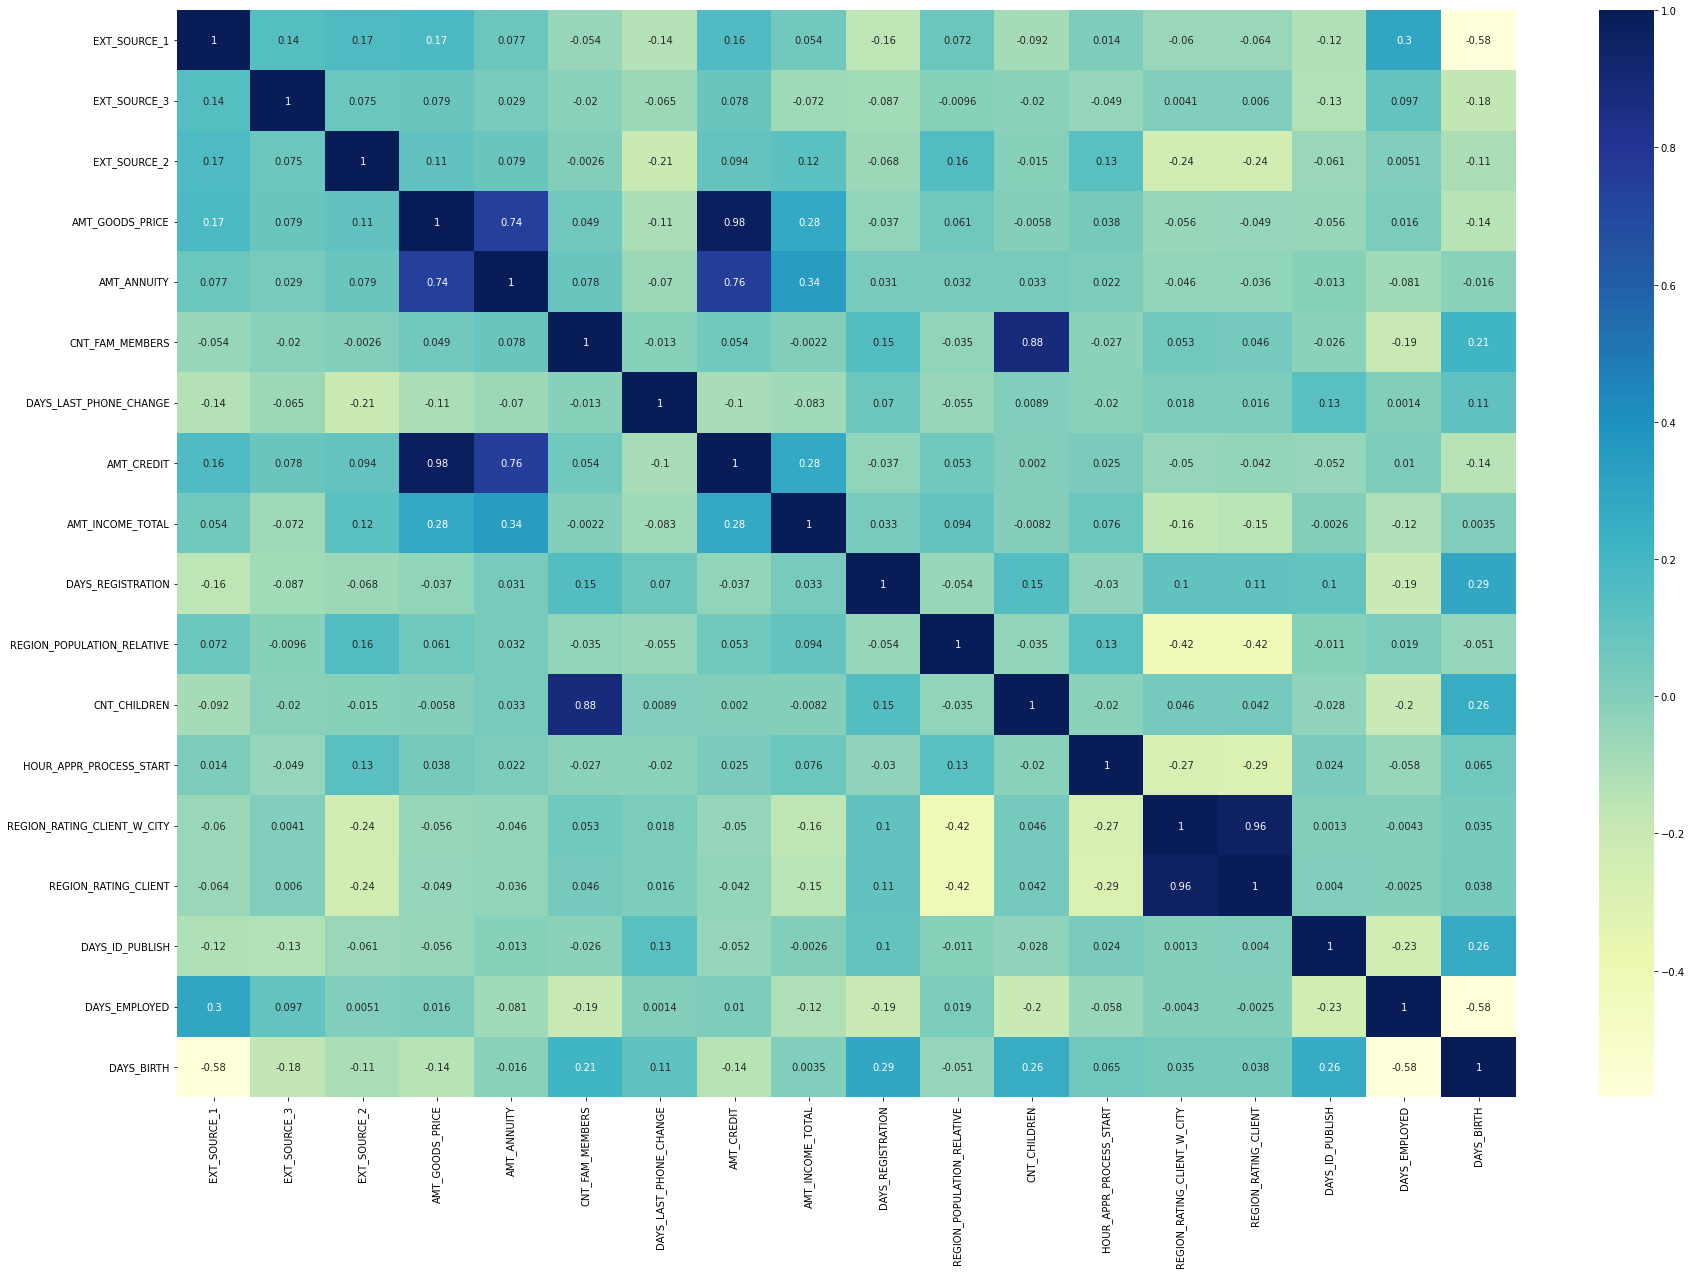

In [93]:
# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(defaulters_correlation, cmap="YlGnBu", annot=True)
plt.show()

In [94]:
nondefaulters_1=nondefaulters[cols]
nondefaulters_correlation = nondefaulters_1.corr()
round(nondefaulters_correlation, 3)

,EXT_SOURCE_1,EXT_SOURCE_3,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,AMT_INCOME_TOTAL,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,CNT_CHILDREN,HOUR_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_BIRTH
EXT_SOURCE_1,1.000,0.171,0.190,0.142,0.076,-0.100,-0.130,0.135,0.053,-0.185,0.076,-0.140,0.019,-0.092,-0.092,-0.138,0.307,-0.610
EXT_SOURCE_3,0.171,1.000,0.084,0.021,0.003,-0.028,-0.070,0.019,-0.102,-0.104,-0.009,-0.042,-0.045,-0.006,-0.008,-0.127,0.114,-0.202
EXT_SOURCE_2,0.190,0.084,1.000,0.102,0.088,-0.003,-0.189,0.094,0.146,-0.054,0.180,-0.016,0.152,-0.271,-0.275,-0.043,-0.026,-0.079
AMT_GOODS_PRICE,0.142,0.021,0.102,1.000,0.777,0.056,-0.078,0.982,0.311,0.005,0.051,-0.003,0.050,-0.054,-0.050,-0.005,-0.061,-0.049
AMT_ANNUITY,0.076,0.003,0.088,0.777,1.000,0.074,-0.067,0.788,0.374,0.032,0.059,0.020,0.035,-0.082,-0.073,0.017,-0.106,0.014
CNT_FAM_MEMBERS,-0.100,-0.028,-0.003,0.056,0.074,1.000,-0.029,0.057,0.033,0.179,-0.025,0.876,-0.010,0.031,0.030,-0.017,-0.243,0.289
DAYS_LAST_PHONE_CHANGE,-0.130,-0.070,-0.189,-0.078,-0.067,-0.029,1.000,-0.074,-0.058,0.051,-0.039,-0.009,-0.014,0.020,0.020,0.087,0.027,0.075
AMT_CREDIT,0.135,0.019,0.094,0.982,0.788,0.057,-0.074,1.000,0.310,0.002,0.047,0.000,0.039,-0.054,-0.049,-0.003,-0.063,-0.052
AMT_INCOME_TOTAL,0.053,-0.102,0.146,0.311,0.374,0.033,-0.058,0.310,1.000,0.076,0.153,0.031,0.085,-0.206,-0.189,0.033,-0.181,0.092
DAYS_REGISTRATION,-0.185,-0.104,-0.054,0.005,0.032,0.179,0.051,0.002,0.076,1.000,-0.049,0.190,-0.008,0.073,0.078,0.102,-0.215,0.337


In [95]:
nondefaulters_correlation.head(10).index

Index(['EXT_SOURCE_1', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION'],
      dtype='object')

In [96]:
c2=nondefaulters_correlation.unstack()
c2.sort_values(ascending=False).drop_duplicates().head(10)

EXT_SOURCE_1          EXT_SOURCE_1                   1.000000
AMT_GOODS_PRICE       AMT_CREDIT                     0.982297
REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY    0.951948
CNT_CHILDREN          CNT_FAM_MEMBERS                0.875975
AMT_ANNUITY           AMT_CREDIT                     0.788132
AMT_GOODS_PRICE       AMT_ANNUITY                    0.777458
AMT_INCOME_TOTAL      AMT_ANNUITY                    0.374155
CNT_CHILDREN          DAYS_BIRTH                     0.340367
DAYS_REGISTRATION     DAYS_BIRTH                     0.336713
AMT_GOODS_PRICE       AMT_INCOME_TOTAL               0.311227
dtype: float64

In [97]:
c2.sort_values(ascending=False).drop_duplicates().tail(10)

CNT_CHILDREN                 DAYS_EMPLOYED                -0.250333
REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START      -0.256042
                             EXT_SOURCE_2                 -0.270846
EXT_SOURCE_2                 REGION_RATING_CLIENT         -0.275295
HOUR_APPR_PROCESS_START      REGION_RATING_CLIENT         -0.276422
DAYS_ID_PUBLISH              DAYS_EMPLOYED                -0.285300
REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE   -0.503087
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT         -0.503879
EXT_SOURCE_1                 DAYS_BIRTH                   -0.609918
DAYS_EMPLOYED                DAYS_BIRTH                   -0.631045
dtype: float64

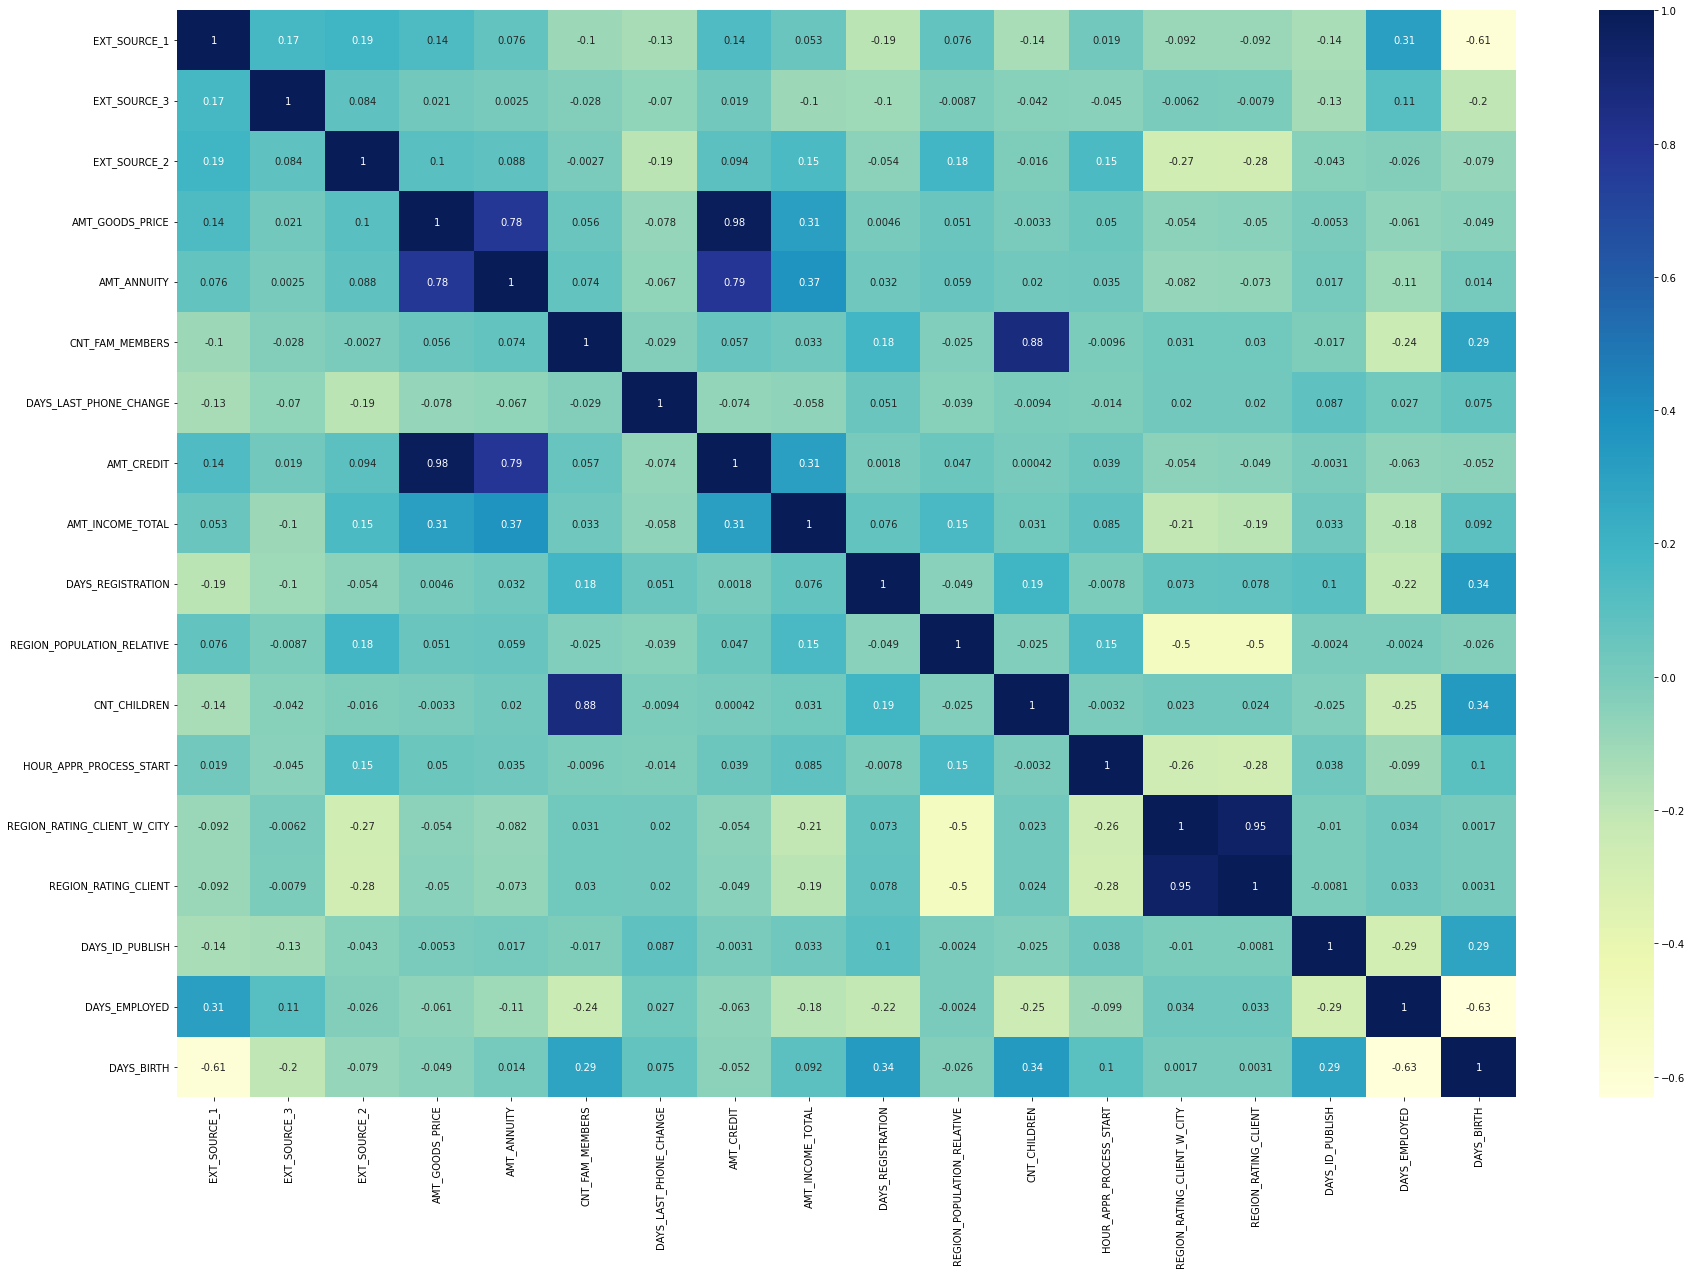

In [98]:
# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(nondefaulters_correlation, cmap="YlGnBu", annot=True)
plt.show()

# **Analysing Previous Application Data:**



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


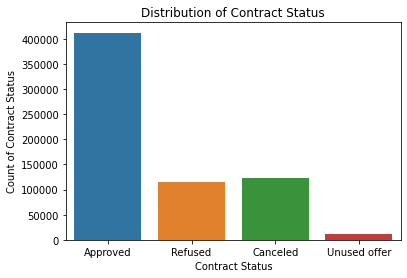

In [99]:
sns.countplot(df_prevData.NAME_CONTRACT_STATUS)
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

**Identifying missing values and filtering out columns with high missing values**



In [100]:
prev_meta_data=metadata(df_prevData)
prev_meta_data.reset_index(drop=False).head(20)

,index,Total,Percent,Unique,Data_Type
0,RATE_DOWN_PAYMENT,349832,52.996979,100557,float64
1,AMT_DOWN_PAYMENT,349832,52.996979,17367,float64
2,NAME_TYPE_SUITE,323902,49.068775,7,object
3,NFLAG_INSURED_ON_APPROVAL,263482,39.915588,2,float64
4,DAYS_TERMINATION,263482,39.915588,2807,float64
5,DAYS_LAST_DUE,263482,39.915588,2851,float64
6,DAYS_LAST_DUE_1ST_VERSION,263482,39.915588,4571,float64
7,DAYS_FIRST_DUE,263482,39.915588,2892,float64
8,DAYS_FIRST_DRAWING,263482,39.915588,2628,float64
9,AMT_GOODS_PRICE,150719,22.832822,60841,float64


In [101]:
#dropping columns with more than 90% missing values 
cols_to_keep=list(prev_meta_data[(prev_meta_data.Percent<90)].index)
df_prevData=df_prevData[cols_to_keep]
df_prevData.describe()

,RATE_DOWN_PAYMENT,AMT_DOWN_PAYMENT,NFLAG_INSURED_ON_APPROVAL,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,DAYS_FIRST_DRAWING,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,SELLERPLACE_AREA,DAYS_DECISION,NFLAG_LAST_APPL_IN_DAY,HOUR_APPR_PROCESS_START,SK_ID_CURR,AMT_CREDIT,AMT_APPLICATION,SK_ID_PREV
count,310266.000000,3.102660e+05,396616.000000,396616.000000,396616.000000,396616.000000,396616.000000,396616.000000,5.093790e+05,514035.000000,514037.000000,6.600970e+05,660097.000000,660097.000000,660097.000000,660098.00000,6.600980e+05,6.600980e+05,6.600980e+05
mean,0.079774,6.708690e+03,0.330506,81743.298674,76427.346701,33353.086686,13638.709165,342468.839878,2.247895e+05,15827.461561,15.922685,3.214945e+02,-884.569750,0.996378,12.485720,278285.04458,1.939271e+05,1.734423e+05,1.921935e+06
std,0.107871,2.049007e+04,0.470396,153142.680774,149540.055664,106283.268753,72008.988203,88447.230111,3.119280e+05,14697.873262,14.438308,8.681036e+03,780.411408,0.060076,3.332616,102827.14249,3.156464e+05,2.897842e+05,5.333108e+05
min,-0.000014,-9.000000e-01,0.000000,-2874.000000,-2889.000000,-2801.000000,-2892.000000,-2921.000000,0.000000e+00,0.000000,0.000000,-1.000000e+00,-2922.000000,0.000000,0.000000,100001.00000,0.000000e+00,0.000000e+00,1.000001e+06
25%,0.000000,0.000000e+00,0.000000,-1275.000000,-1319.000000,-1248.000000,-1632.000000,365243.000000,5.023350e+04,6279.300000,6.000000,-1.000000e+00,-1310.000000,1.000000,10.000000,189238.00000,2.436750e+04,1.930500e+04,1.459398e+06
50%,0.052403,1.665000e+03,0.000000,-501.000000,-539.000000,-364.000000,-832.000000,365243.000000,1.102500e+05,11239.785000,12.000000,4.000000e+00,-585.000000,1.000000,12.000000,278501.50000,7.975800e+04,7.070850e+04,1.922252e+06
75%,0.108909,7.780500e+03,1.000000,-45.000000,-74.000000,125.000000,-411.000000,365243.000000,2.295000e+05,20381.130000,24.000000,8.900000e+01,-282.000000,1.000000,15.000000,367572.00000,2.109015e+05,1.800000e+05,2.383851e+06
max,0.989740,2.150100e+06,1.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,4.237875e+06,418058.145000,84.000000,4.000000e+06,-2.000000,1.000000,23.000000,456255.00000,4.104351e+06,4.237875e+06,2.845382e+06


In [102]:
#Checking columns with very less missing values
low_missing=pd.DataFrame(prev_meta_data[(prev_meta_data.Percent>0)&(prev_meta_data.Percent<13)])
low_missing

,Total,Percent,Unique,Data_Type
PRODUCT_COMBINATION,132,0.019997,17,object
NAME_YIELD_GROUP,1,0.000151,5,object
NAME_SELLER_INDUSTRY,1,0.000151,11,object
SELLERPLACE_AREA,1,0.000151,1944,float64
CHANNEL_TYPE,1,0.000151,8,object
NAME_PRODUCT_TYPE,1,0.000151,3,object
NAME_GOODS_CATEGORY,1,0.000151,27,object
NAME_PORTFOLIO,1,0.000151,5,object
CODE_REJECT_REASON,1,0.000151,9,object
NAME_CLIENT_TYPE,1,0.000151,4,object


In [103]:
cols_to_convert=list(prev_meta_data[(prev_meta_data.Unique==2)&((prev_meta_data.Data_Type=="int64")|(prev_meta_data.Data_Type=="float64"))].index)
cols_to_convert

['NFLAG_INSURED_ON_APPROVAL', 'NFLAG_LAST_APPL_IN_DAY']

In [ ]:
def convert_data(df_prevData, cols_to_convert):
    for y in cols_to_convert:
        df_prevData.loc[:,y].replace((0, 1), ('N', 'Y'), inplace=True)
    return df_prevData
convert_data(df_prevData, cols_to_convert)
df_prevData.dtypes.value_counts()

# **Dividing DataFrame based on Contract Status**

In [104]:
approved=df_prevData[df_prevData.NAME_CONTRACT_STATUS=='Approved']
refused=df_prevData[df_prevData.NAME_CONTRACT_STATUS=='Refused']
canceled=df_prevData[df_prevData.NAME_CONTRACT_STATUS=='Canceled']
unused=df_prevData[df_prevData.NAME_CONTRACT_STATUS=='Unused Offer']

In [105]:
percentage_approved=(len(approved)*100)/len(df_prevData)
percentage_refused=(len(refused)*100)/len(df_prevData)
percentage_canceled=(len(canceled)*100)/len(df_prevData)
percentage_unused=(len(unused)*100)/len(df_prevData)

print("The Percentage of people whose loans have been Approved is:",round(percentage_approved,2),"%")
print("The Percentage of people whose loans have been Refused is:",round(percentage_refused,2),"%")
print("The Percentage of people whose loans have been Canceled is:",round(percentage_canceled,2),"%")
print("The Percentage of people whose loans have been Unused is:",round(percentage_unused,2),"%")


The Percentage of people whose loans have been Approved is: 62.42 %
The Percentage of people whose loans have been Refused is: 17.29 %
The Percentage of people whose loans have been Canceled is: 18.67 %
The Percentage of people whose loans have been Unused is: 0.0 %


In [106]:
def plot_3charts(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
    else:
        fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(15,30))
    
    s1=sns.countplot(ax=ax1,x=refused[var], data=refused, order= refused[var].value_counts().index,)
    ax1.set_title("Refused", fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    
    s2=sns.countplot(ax=ax2,x=approved[var], data=approved, order= approved[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title("Approved", fontsize=10)
    
    
    s3=sns.countplot(ax=ax3,x=canceled[var], data=canceled, order= canceled[var].value_counts().index,)
    ax3.set_title("Canceled", fontsize=10)
    ax3.set_xlabel('%s' %var)
    ax3.set_ylabel("Count of Loans")
    if(label_rotation):
        s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
    plt.show()

In [107]:
df_prevData.select_dtypes('object').columns

Index(['NAME_TYPE_SUITE', 'PRODUCT_COMBINATION', 'NAME_YIELD_GROUP',
       'NAME_SELLER_INDUSTRY', 'CHANNEL_TYPE', 'NAME_PRODUCT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_PAYMENT_TYPE', 'NAME_CONTRACT_STATUS',
       'NAME_CASH_LOAN_PURPOSE', 'FLAG_LAST_APPL_PER_CONTRACT',
       'WEEKDAY_APPR_PROCESS_START', 'NAME_CONTRACT_TYPE'],
      dtype='object')

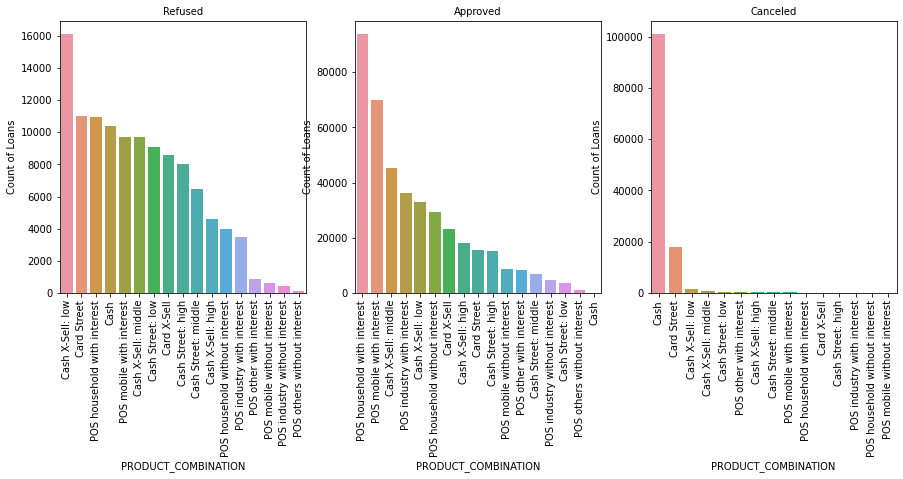

In [108]:
#Plot for PRODUCT_COMBINATION
plot_3charts('PRODUCT_COMBINATION', label_rotation=True,horizontal_layout=True)

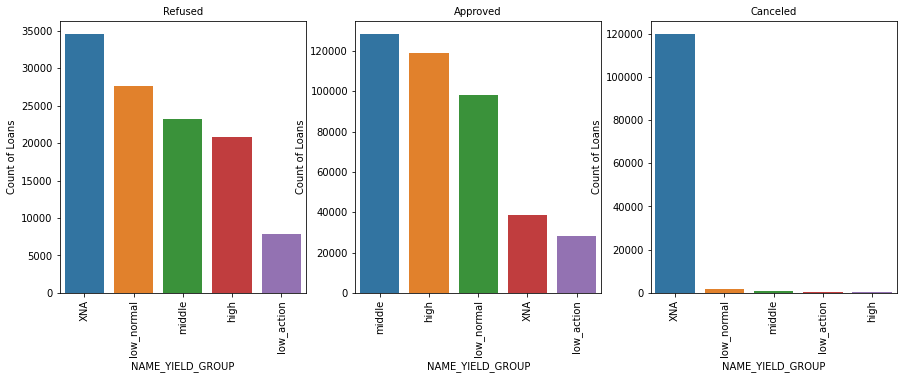

In [109]:
#Plot for NAME_YIELD_GROUP
plot_3charts('NAME_YIELD_GROUP', label_rotation=True,horizontal_layout=True)

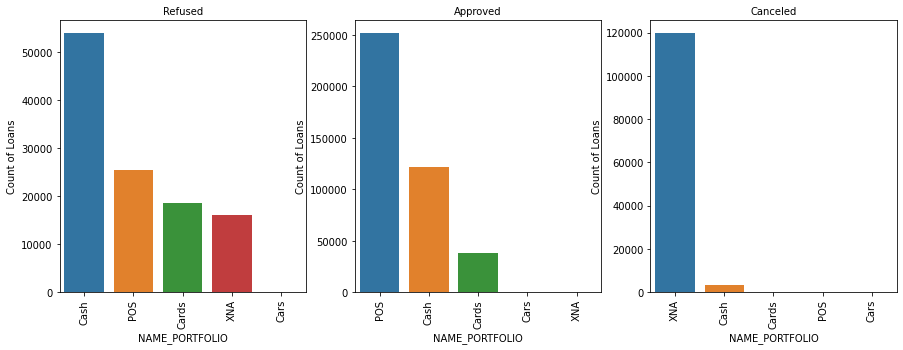

In [110]:
# Plot for NAME_PORTFOLIO
plot_3charts('NAME_PORTFOLIO', label_rotation=True,horizontal_layout=True)

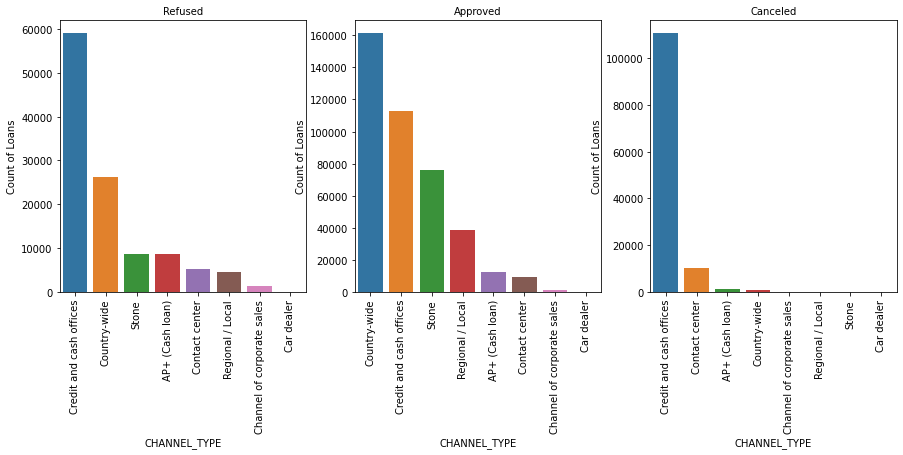

In [111]:
plot_3charts('CHANNEL_TYPE', label_rotation=True,horizontal_layout=True)

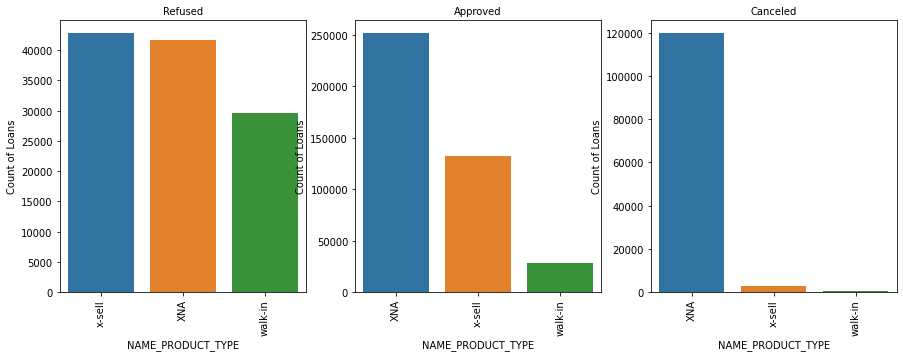

In [112]:
plot_3charts('NAME_PRODUCT_TYPE', label_rotation=True,horizontal_layout=True)

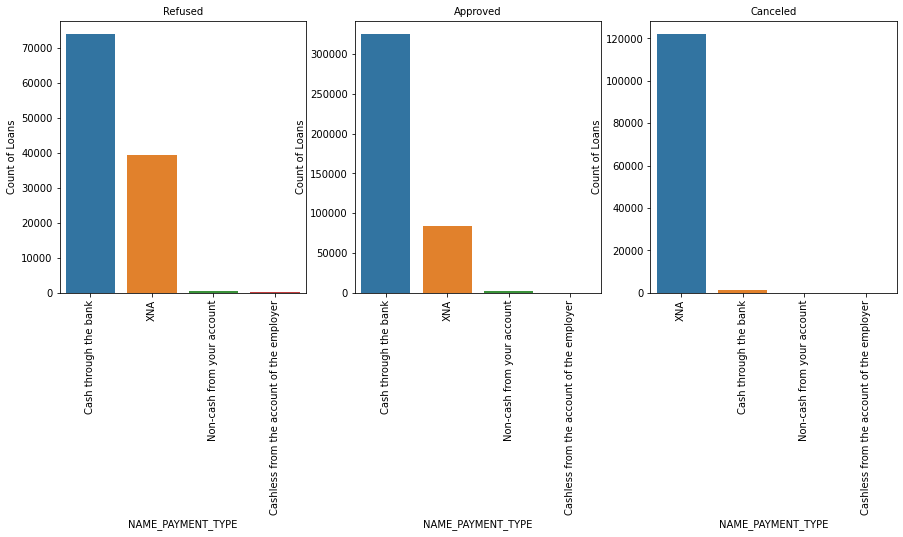

In [113]:
plot_3charts('NAME_PAYMENT_TYPE', label_rotation=True,horizontal_layout=True)

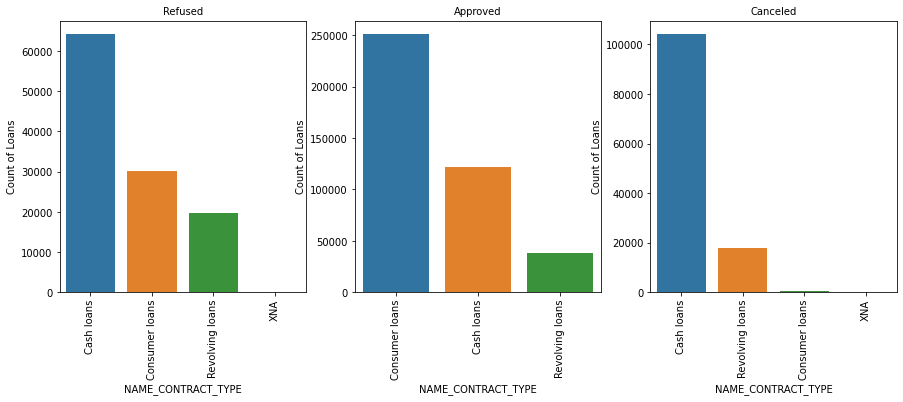

In [114]:
plot_3charts('NAME_CONTRACT_TYPE', label_rotation=True,horizontal_layout=True)

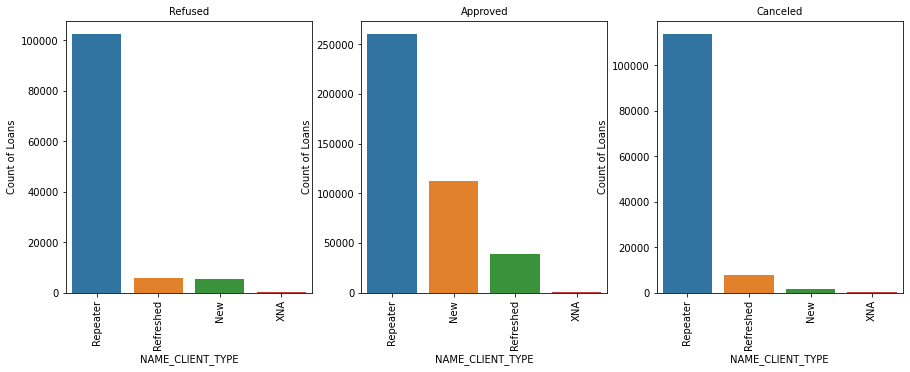

In [115]:
plot_3charts('NAME_CLIENT_TYPE', label_rotation=True,horizontal_layout=True)

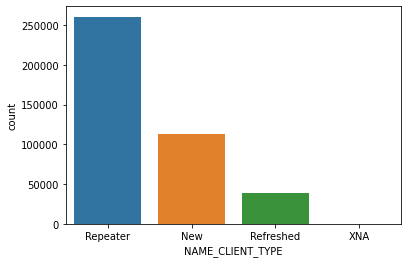

In [116]:
sns.countplot(x=approved['NAME_CLIENT_TYPE'], data=df_prevData)

# **Removing Outliers from previous application data**



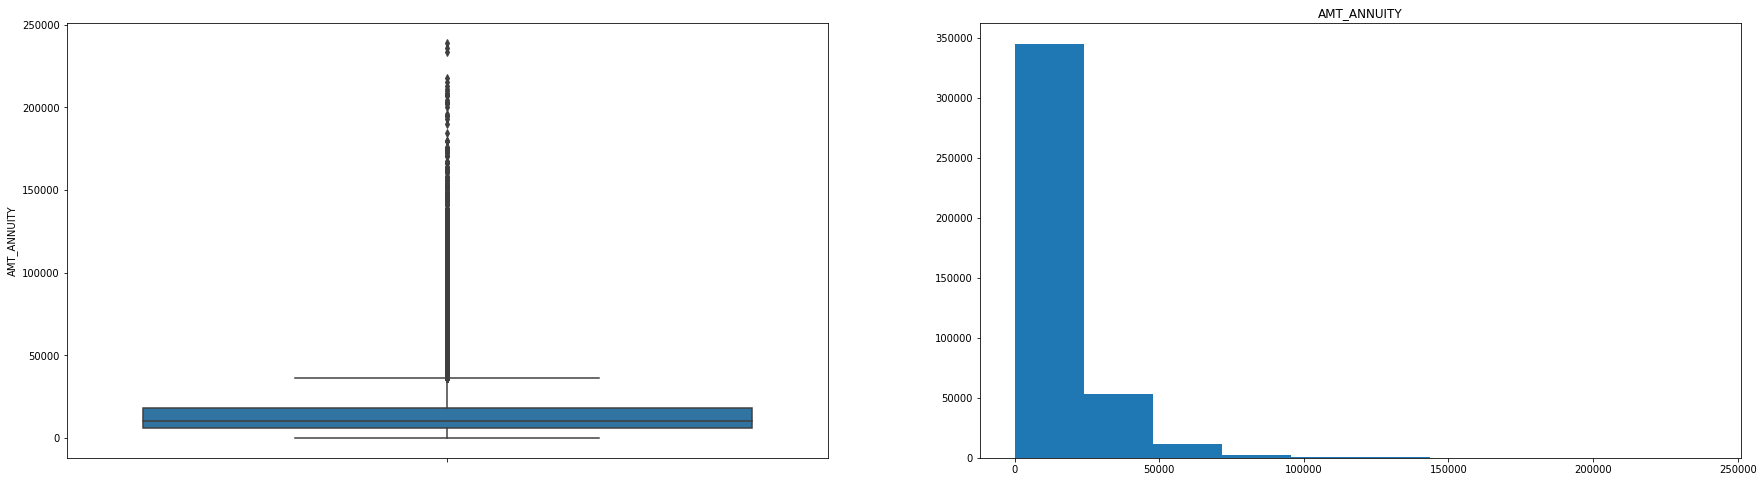

In [117]:
fig, ax = plt.subplots(figsize = (30, 8))
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_ANNUITY']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_ANNUITY'])
plt.title('AMT_ANNUITY')
plt.show()

Text(0.5, 1.0, 'AMT_ANNUITY')

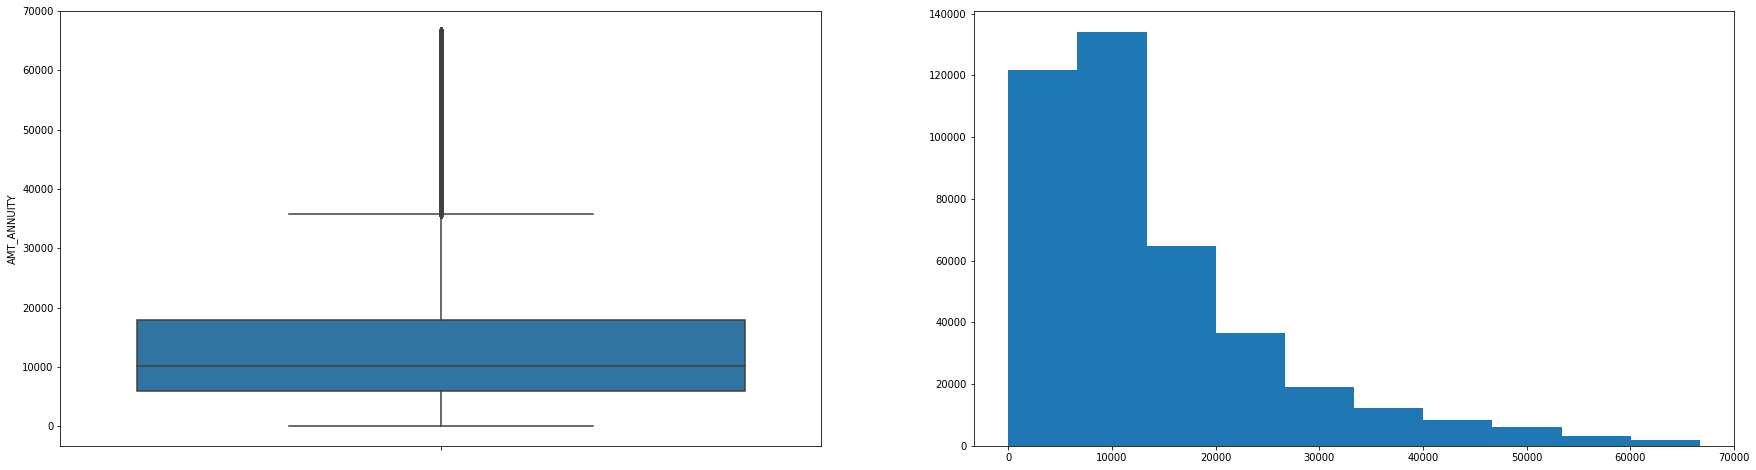

In [118]:
approved=approved[approved.AMT_ANNUITY<np.nanpercentile(approved['AMT_ANNUITY'], 99)]
fig, ax = plt.subplots(figsize = (30, 8))
ax.set_title('AMT_ANNUITY boxplot on data within 99 percentile');
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_ANNUITY']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_ANNUITY'])
ax.set_title('AMT_ANNUITY')

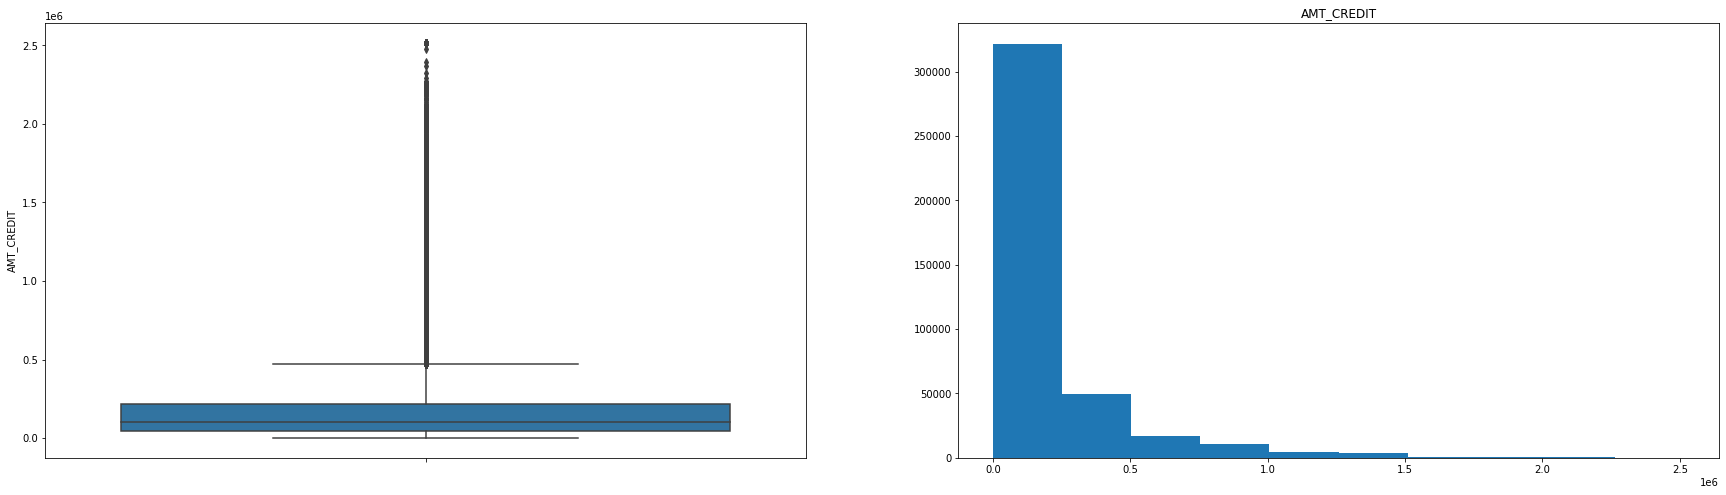

In [119]:
fig, ax = plt.subplots(figsize = (30, 8))
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_CREDIT']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_CREDIT'])
plt.title('AMT_CREDIT')
plt.show()

Text(0.5, 1.0, 'AMT_CREDIT')

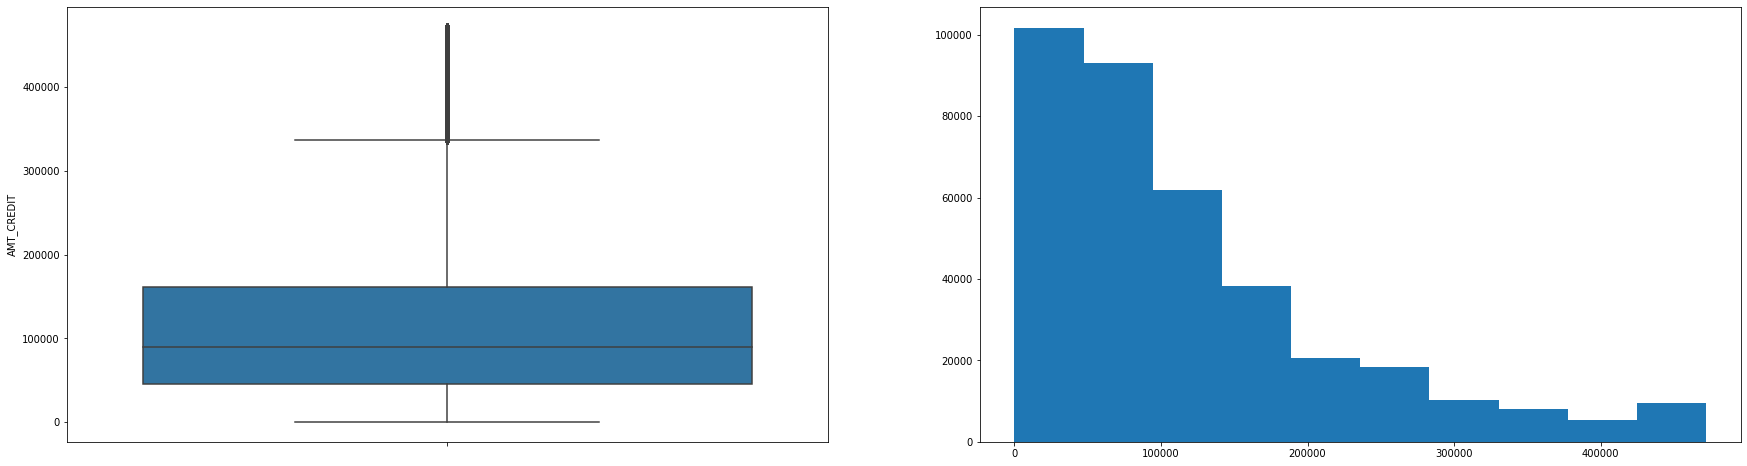

In [120]:
approved=approved[approved.AMT_CREDIT<np.nanpercentile(approved['AMT_CREDIT'], 90)]
fig, ax = plt.subplots(figsize = (30, 8))
ax.set_title('AMT_CREDIT boxplot on data within 99 percentile');
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_CREDIT']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_CREDIT'])
ax.set_title('AMT_CREDIT')

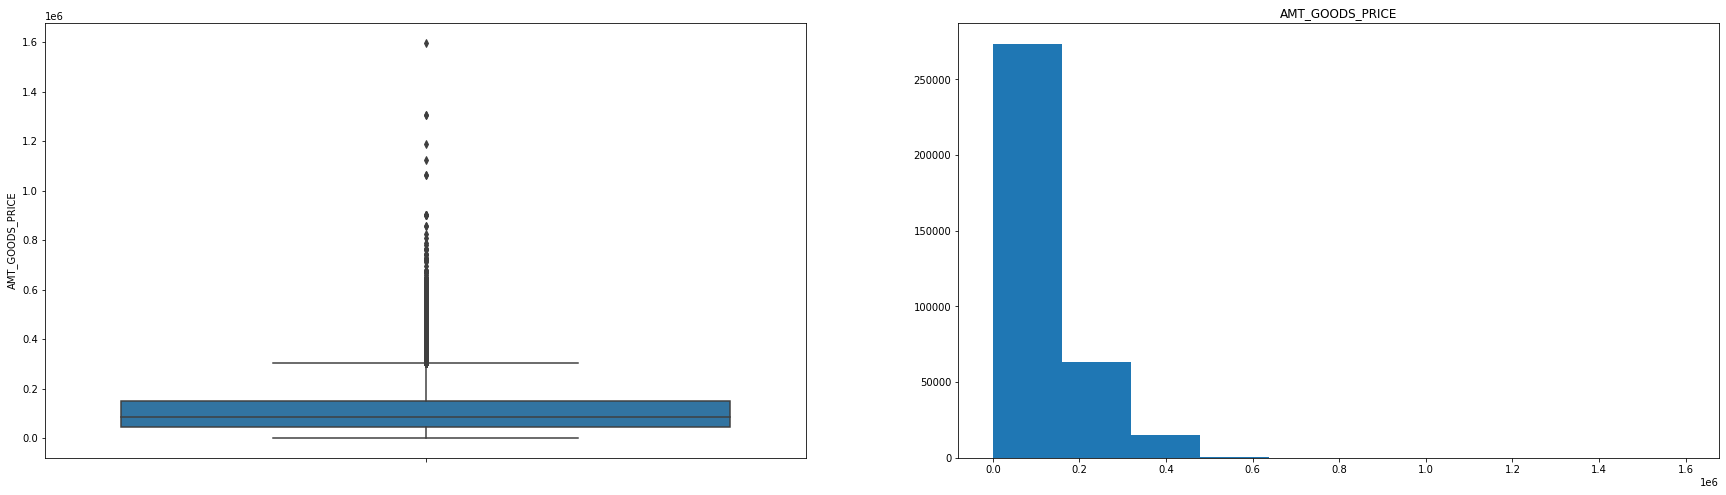

In [121]:
fig, ax = plt.subplots(figsize = (30, 8))
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_GOODS_PRICE']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_GOODS_PRICE'])
plt.title('AMT_GOODS_PRICE')
plt.show()

Text(0.5, 1.0, 'AMT_GOODS_PRICE')

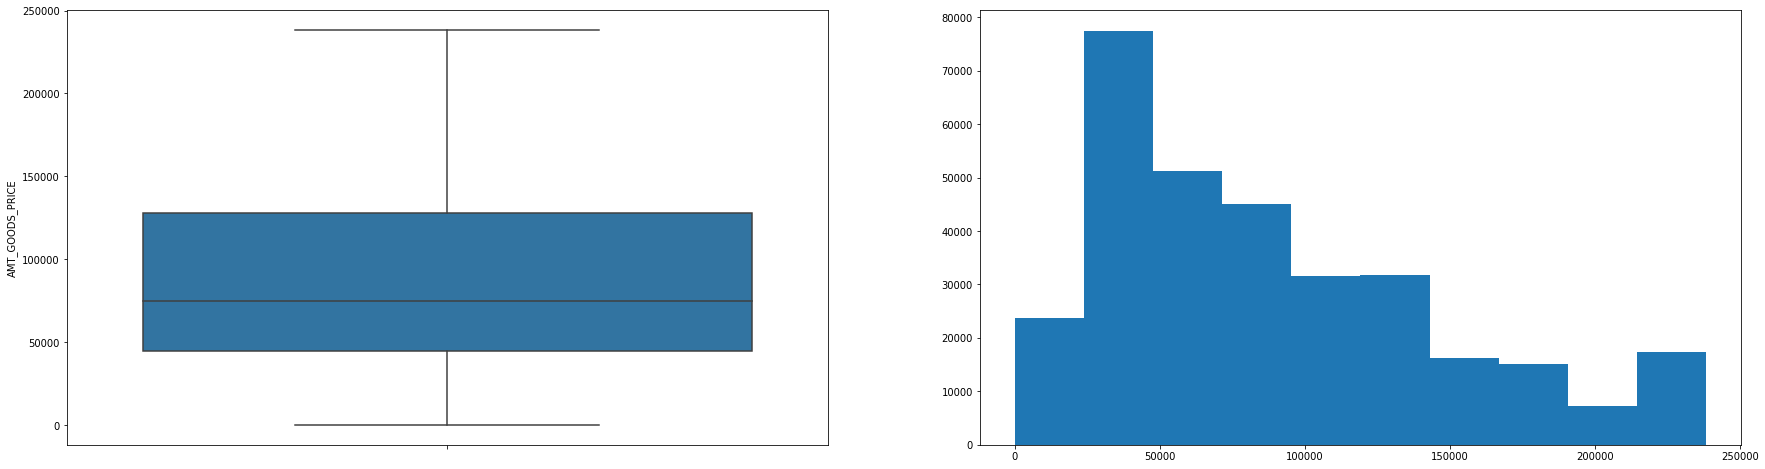

In [122]:
approved=approved[approved.AMT_GOODS_PRICE<np.nanpercentile(approved['AMT_GOODS_PRICE'], 90)]
fig, ax = plt.subplots(figsize = (30, 8))
ax.set_title('AMT_GOODS_PRICE boxplot on data within 99 percentile');
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_GOODS_PRICE']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_GOODS_PRICE'])
ax.set_title('AMT_GOODS_PRICE')

# **Bivariate Analysis for Previous application data:**



In [123]:
cols_approved=['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT', 'AMT_CREDIT', 'DAYS_DECISION', 'AMT_APPLICATION']
approved_num=approved[cols_approved]

In [124]:
cols_refused=['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT', 'AMT_CREDIT', 'DAYS_DECISION', 'AMT_APPLICATION']
refused_num=refused[cols_refused]

In [125]:
#calculating correlation for approved
approved_correlation = approved_num.corr()
round(approved_correlation, 3)

,AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,DAYS_FIRST_DRAWING,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,AMT_CREDIT,DAYS_DECISION,AMT_APPLICATION
AMT_DOWN_PAYMENT,1.000,0.785,-0.078,-0.080,-0.003,-0.023,-0.005,0.252,0.199,-0.151,0.051,-0.070,0.252
RATE_DOWN_PAYMENT,0.785,1.000,-0.145,-0.148,-0.010,-0.041,-0.008,-0.138,-0.123,-0.300,-0.307,-0.208,-0.138
DAYS_TERMINATION,-0.078,-0.145,1.000,0.965,0.469,0.384,-0.346,0.136,-0.060,0.003,0.152,0.477,0.136
DAYS_LAST_DUE,-0.080,-0.148,0.965,1.000,0.474,0.432,-0.309,0.135,-0.063,0.003,0.151,0.478,0.135
DAYS_LAST_DUE_1ST_VERSION,-0.003,-0.010,0.469,0.474,1.000,0.583,-0.737,0.004,-0.185,-0.374,0.008,0.232,0.004
DAYS_FIRST_DUE,-0.023,-0.041,0.384,0.432,0.583,1.000,-0.039,-0.032,-0.122,-0.224,-0.029,0.222,-0.032
DAYS_FIRST_DRAWING,-0.005,-0.008,-0.346,-0.309,-0.737,-0.039,1.000,-0.025,0.126,0.279,-0.026,-0.154,-0.025
AMT_GOODS_PRICE,0.252,-0.138,0.136,0.135,0.004,-0.032,-0.025,1.000,0.746,0.425,0.969,0.240,1.000
AMT_ANNUITY,0.199,-0.123,-0.060,-0.063,-0.185,-0.122,0.126,0.746,1.000,0.026,0.722,0.168,0.746
CNT_PAYMENT,-0.151,-0.300,0.003,0.003,-0.374,-0.224,0.279,0.425,0.026,1.000,0.493,0.042,0.425


In [126]:
c1=approved_correlation.unstack()
c1.sort_values(ascending=False).drop_duplicates().head(10)

AMT_DOWN_PAYMENT           AMT_DOWN_PAYMENT     1.000000
AMT_APPLICATION            AMT_CREDIT           0.969457
AMT_CREDIT                 AMT_GOODS_PRICE      0.969457
DAYS_TERMINATION           DAYS_LAST_DUE        0.964761
AMT_DOWN_PAYMENT           RATE_DOWN_PAYMENT    0.784660
AMT_GOODS_PRICE            AMT_ANNUITY          0.746409
AMT_ANNUITY                AMT_CREDIT           0.721566
DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DUE       0.583374
CNT_PAYMENT                AMT_CREDIT           0.493226
DAYS_LAST_DUE              DAYS_DECISION        0.478115
dtype: float64

In [127]:
c1.sort_values(ascending=False).drop_duplicates().tail(10)

DAYS_DECISION              DAYS_FIRST_DRAWING          -0.153550
AMT_ANNUITY                DAYS_LAST_DUE_1ST_VERSION   -0.184725
DAYS_DECISION              RATE_DOWN_PAYMENT           -0.207788
CNT_PAYMENT                DAYS_FIRST_DUE              -0.224143
RATE_DOWN_PAYMENT          CNT_PAYMENT                 -0.299647
AMT_CREDIT                 RATE_DOWN_PAYMENT           -0.306880
DAYS_LAST_DUE              DAYS_FIRST_DRAWING          -0.309008
DAYS_TERMINATION           DAYS_FIRST_DRAWING          -0.345974
DAYS_LAST_DUE_1ST_VERSION  CNT_PAYMENT                 -0.373560
                           DAYS_FIRST_DRAWING          -0.737471
dtype: float64

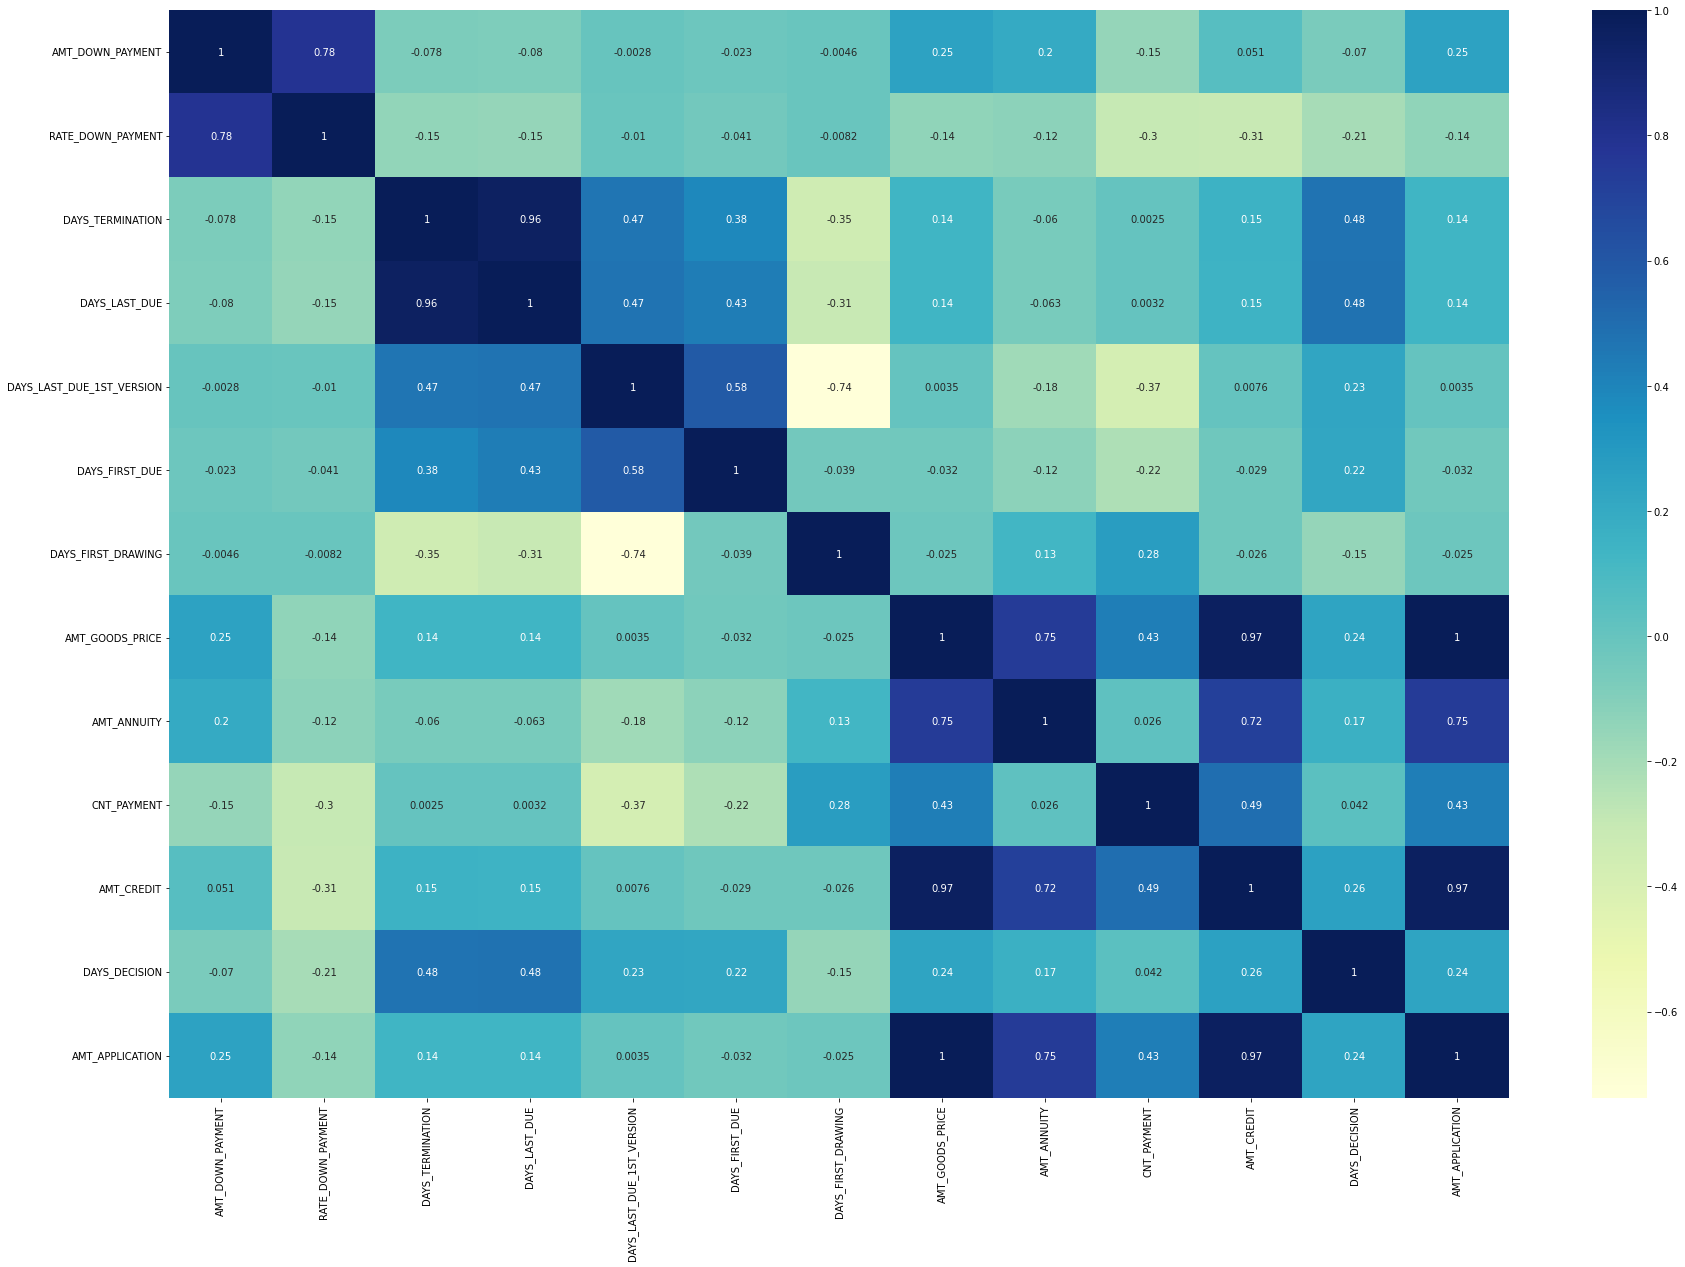

In [128]:
# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(approved_correlation, cmap="YlGnBu", annot=True)
plt.show()

In [129]:
#calculating correlation for approved
refused_correlation = refused_num.corr()
round(refused_correlation, 3)

,AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,AMT_CREDIT,DAYS_DECISION,AMT_APPLICATION
AMT_DOWN_PAYMENT,1.000,0.408,0.545,0.297,0.101,0.385,0.009,0.545
RATE_DOWN_PAYMENT,0.408,1.000,-0.017,-0.083,-0.240,-0.109,-0.235,-0.017
AMT_GOODS_PRICE,0.545,-0.017,1.000,0.822,0.659,0.992,0.332,1.000
AMT_ANNUITY,0.297,-0.083,0.822,1.000,0.430,0.820,0.287,0.817
CNT_PAYMENT,0.101,-0.240,0.659,0.430,1.000,0.679,0.300,0.671
AMT_CREDIT,0.385,-0.109,0.992,0.820,0.679,1.000,0.269,0.983
DAYS_DECISION,0.009,-0.235,0.332,0.287,0.300,0.269,1.000,0.263
AMT_APPLICATION,0.545,-0.017,1.000,0.817,0.671,0.983,0.263,1.000


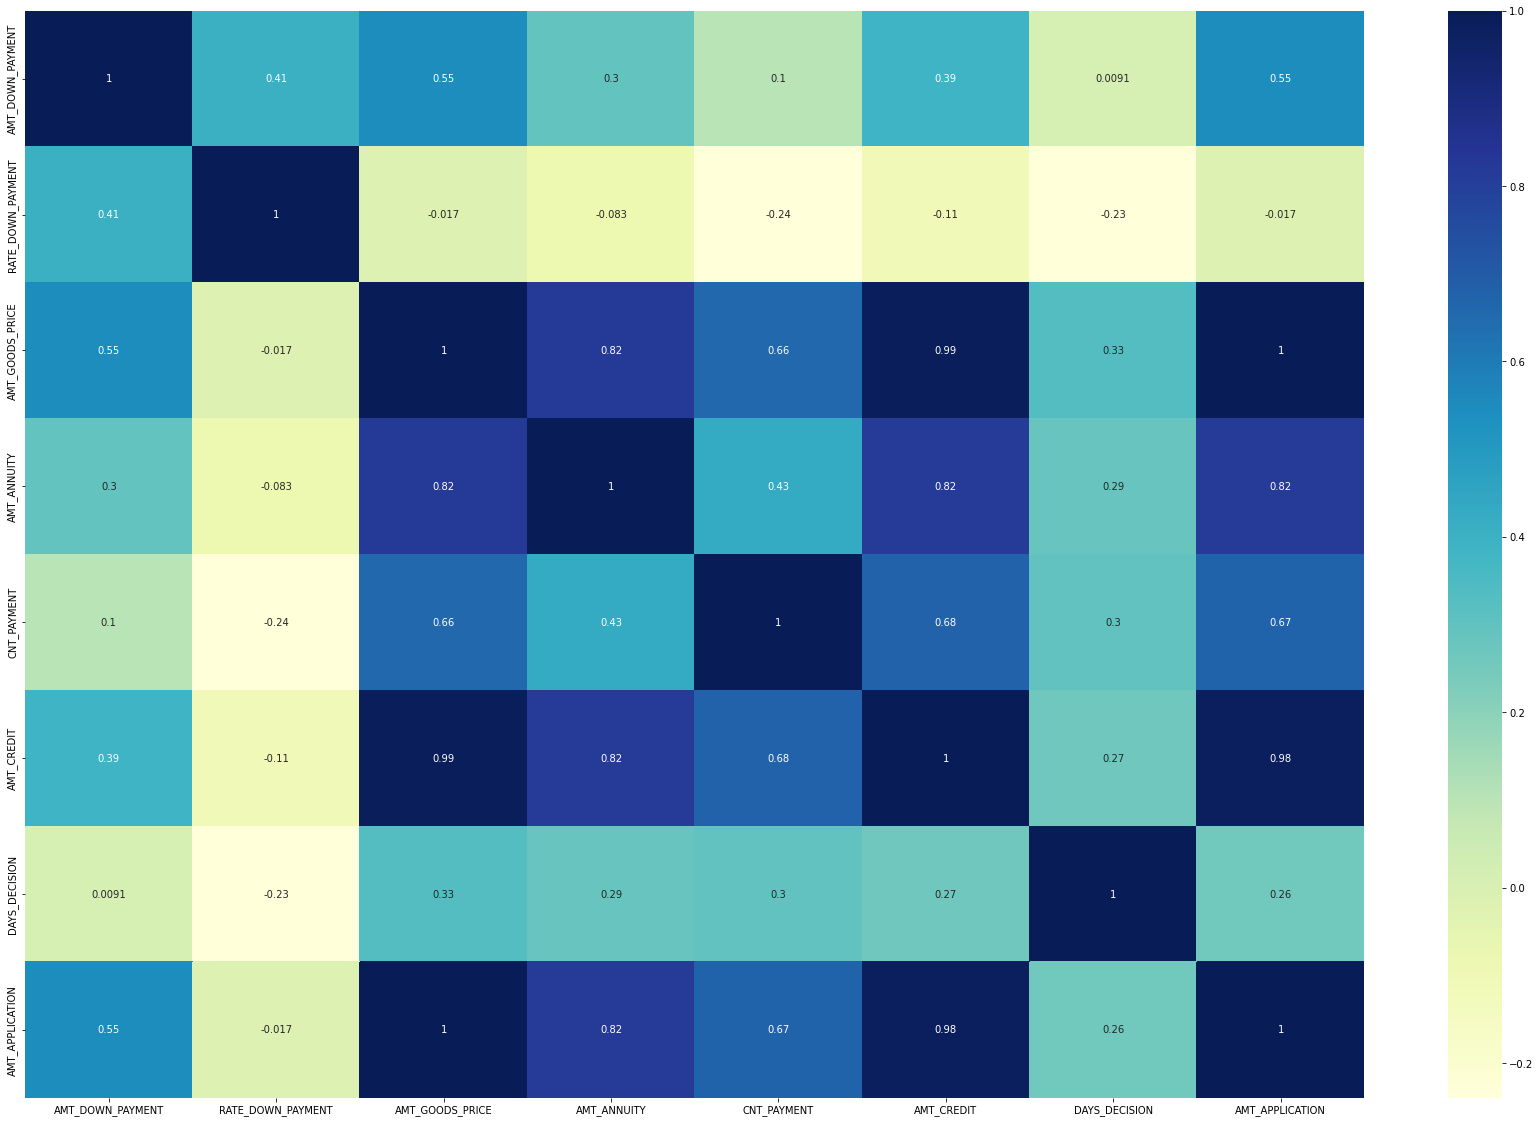

In [130]:
# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(refused_correlation, cmap="YlGnBu", annot=True)
plt.show()

In [131]:
df_appData.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,Y,Y,N,Y,Y,N,Laborers,1.0,2,2,WEDNESDAY,10,N,N,N,N,N,N,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,Y,Y,N,Y,Y,N,Core staff,2.0,1,1,MONDAY,11,N,N,N,N,N,N,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,Y,Y,Y,Y,Y,N,Laborers,1.0,2,2,MONDAY,9,N,N,N,N,N,N,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [132]:
df_prevData.head()

,RATE_DOWN_PAYMENT,AMT_DOWN_PAYMENT,NAME_TYPE_SUITE,NFLAG_INSURED_ON_APPROVAL,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,DAYS_FIRST_DRAWING,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,PRODUCT_COMBINATION,NAME_YIELD_GROUP,NAME_SELLER_INDUSTRY,SELLERPLACE_AREA,CHANNEL_TYPE,NAME_PRODUCT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_PAYMENT_TYPE,DAYS_DECISION,NAME_CONTRACT_STATUS,NAME_CASH_LOAN_PURPOSE,NFLAG_LAST_APPL_IN_DAY,FLAG_LAST_APPL_PER_CONTRACT,HOUR_APPR_PROCESS_START,WEEKDAY_APPR_PROCESS_START,SK_ID_CURR,AMT_CREDIT,AMT_APPLICATION,NAME_CONTRACT_TYPE,SK_ID_PREV
0,0.0,0.0,NaN,0.0,-37.0,-42.0,300.0,-42.0,365243.0,17145.0,1730.430,12.0,POS mobile with interest,middle,Connectivity,35.0,Country-wide,XNA,Mobile,POS,XAP,Repeater,Cash through the bank,-73.0,Approved,XAP,1.0,Y,15.0,SATURDAY,271877,17145.0,17145.0,Consumer loans,2030495
1,NaN,NaN,Unaccompanied,1.0,365243.0,365243.0,916.0,-134.0,365243.0,607500.0,25188.615,36.0,Cash X-Sell: low,low_action,XNA,-1.0,Contact center,x-sell,XNA,Cash,XAP,Repeater,XNA,-164.0,Approved,XNA,1.0,Y,11.0,THURSDAY,108129,679671.0,607500.0,Cash loans,2802425
2,NaN,NaN,"Spouse, partner",1.0,365243.0,365243.0,59.0,-271.0,365243.0,112500.0,15060.735,12.0,Cash X-Sell: high,high,XNA,-1.0,Credit and cash offices,x-sell,XNA,Cash,XAP,Repeater,Cash through the bank,-301.0,Approved,XNA,1.0,Y,11.0,TUESDAY,122040,136444.5,112500.0,Cash loans,2523466
3,NaN,NaN,NaN,1.0,-177.0,-182.0,-152.0,-482.0,365243.0,450000.0,47041.335,12.0,Cash X-Sell: middle,middle,XNA,-1.0,Credit and cash offices,x-sell,XNA,Cash,XAP,Repeater,Cash through the bank,-512.0,Approved,XNA,1.0,Y,7.0,MONDAY,176158,470790.0,450000.0,Cash loans,2819243
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,337500.0,31924.395,24.0,Cash Street: high,high,XNA,-1.0,Credit and cash offices,walk-in,XNA,Cash,HC,Repeater,Cash through the bank,-781.0,Refused,Repairs,1.0,Y,9.0,THURSDAY,202054,404055.0,337500.0,Cash loans,1784265


# **Merge Application & previous data to find insights**


In [133]:
df_curr_prev=pd.merge(df_appData, df_prevData, on='SK_ID_CURR', how='inner')

In [134]:
df_diff_refused=df_curr_prev[['NAME_CONTRACT_STATUS','SK_ID_CURR']].loc[(df_curr_prev['NAME_CONTRACT_STATUS']!='Approved') & (df_curr_prev['TARGET']==1)]
df_diff_refused.head()

,NAME_CONTRACT_STATUS,SK_ID_CURR
67,Refused,100047
235,Unused offer,100160
259,Canceled,100181
354,Canceled,100246
418,Refused,100301


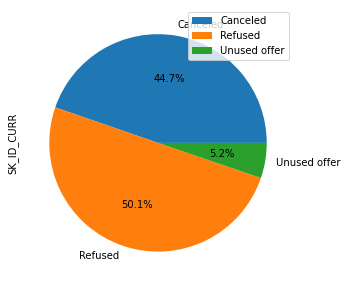

In [135]:
df_diff_refused_plot=df_diff_refused.pivot_table(values='SK_ID_CURR',index='NAME_CONTRACT_STATUS',aggfunc=pd.Series.nunique)
df_diff_refused_plot['percentage']=(df_diff_refused_plot['SK_ID_CURR']/len(df_appData))*100
#bin_diff_refused = pd.DataFrame(df_diff_refused['TARGET'].value_counts(normalize=True) * 100)
df_diff_refused_plot.plot.pie(y='SK_ID_CURR', figsize=(5, 5), autopct='%1.1f%%')
plt.show()

In [136]:
df_curr_prev['NAME_SELLER_INDUSTRY']
df_diff_refused_indus=df_curr_prev[['NAME_SELLER_INDUSTRY','SK_ID_CURR']].loc[(df_curr_prev['TARGET']==1)]
df_diff_refused_industry=df_diff_refused_indus.pivot_table(values='SK_ID_CURR',index='NAME_SELLER_INDUSTRY',aggfunc=pd.Series.nunique)


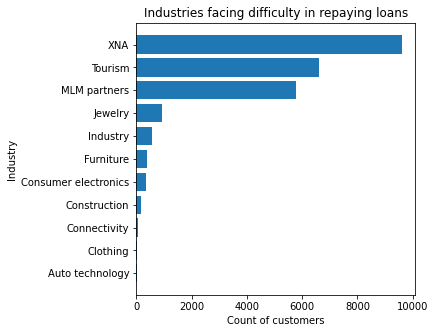

In [137]:
f = plt.figure(figsize=(5,5))
ax=f.add_subplot(1,1,1)
df_diff_refused_industry
ax.barh(df_diff_refused_industry.index,df_diff_refused_industry.SK_ID_CURR.sort_values())
ax.set_title('Industries facing difficulty in repaying loans')
ax.set_xlabel('Count of customers')
ax.set_ylabel('Industry')
plt.show()

**Derived Metrics**



In [138]:
df_curr_prev['income_group']=np.where(df_curr_prev['AMT_INCOME_TOTAL']<=250000,'Non-Tax payer','Tax payer')
df_curr_prev[['income_group','AMT_INCOME_TOTAL']].head()

,income_group,AMT_INCOME_TOTAL
0,Tax payer,270000.0
1,Non-Tax payer,135000.0
2,Non-Tax payer,135000.0
3,Non-Tax payer,121500.0
4,Non-Tax payer,121500.0


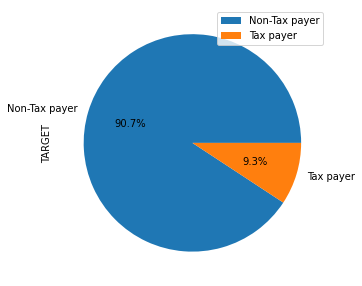

In [139]:
df_sal_category=df_curr_prev[['income_group','TARGET']].loc[(df_curr_prev['TARGET']==1)]
df_sal_category_plot=df_sal_category.pivot_table(values='TARGET',index='income_group',aggfunc='sum')
df_sal_category_plot.plot.pie(y='TARGET', figsize=(5, 5), autopct='%1.1f%%')
plt.show()